
------

### ---- COMPARATIVA DE RATAS SANAS VS ALCOHOLICAS PARA CONJUNTOS DE 18 RATAS CON TH=0.0 - VERSION DEEP ----
#### DATOS ALEJANDRO 08.01.25

------

In [1]:
import os
print(os.environ.get('LD_LIBRARY_PATH', 'NOT SET'))

/home/tonicoll/.conda/envs/tfgpu/lib/::/common/MATLAB/MATLAB_Runtime/R2023b/runtime/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/bin/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/sys/os/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/extern/bin/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/sys/opengl/lib/glnxa64:/common/MATLAB/R2023b/bin/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/runtime/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/bin/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/sys/os/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/extern/bin/glnxa64:/common/MATLAB/MATLAB_Runtime/R2023b/sys/opengl/lib/glnxa64:/common/MATLAB/R2023b/bin/glnxa64:/lib/:/lib/:/home/tonicoll/.conda/envs/tfgpu/lib/


In [2]:
import subprocess
import sys

# Verifica el path actual
result = subprocess.run(['echo', '$LD_LIBRARY_PATH'], 
                       shell=True, capture_output=True, text=True)
print("LD_LIBRARY_PATH:", result.stdout)

# Forzar antes de importar TF
import os
os.environ['LD_LIBRARY_PATH'] = '/home/tonicoll/.conda/envs/tfgpu/lib/'
print("Nuevo LD_LIBRARY_PATH:", os.environ['LD_LIBRARY_PATH'])

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

LD_LIBRARY_PATH: 

Nuevo LD_LIBRARY_PATH: /home/tonicoll/.conda/envs/tfgpu/lib/


2026-01-12 17:00:25.396959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-12 17:00:25.397003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-12 17:00:25.398394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-12 17:00:25.405889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 17:00:26.559172: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:4', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:5', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:6', device_type='GPU')]


In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
print(f"GPUs disponibles: {len(gpus)}\n")

for i, gpu in enumerate(gpus):
    gpu_details = tf.config.experimental.get_device_details(gpu)
    name = gpu_details.get('device_name', 'Unknown')
    
    # Obtener memoria estimada con un test rápido
    with tf.device(f'/GPU:{i}'):
        # Forzar inicialización
        _ = tf.constant(1.0)
    
    print(f"GPU {i}: {name}")
    print(f"  Compute Capability: {gpu_details.get('compute_capability', 'N/A')}")
    print()

GPUs disponibles: 7



2026-01-12 17:00:29.907252: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46537 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:23:00.0, compute capability: 8.9
2026-01-12 17:00:29.909085: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2026-01-12 17:00:29.910759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2026-01-12 17:00:29.912267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce R

GPU 0: NVIDIA RTX 6000 Ada Generation
  Compute Capability: (8, 9)

GPU 1: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)

GPU 2: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)

GPU 3: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)

GPU 4: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)

GPU 5: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)

GPU 6: NVIDIA GeForce RTX 3090
  Compute Capability: (8, 6)



In [4]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')

for i in range(len(gpus)):
    with tf.device(f'/GPU:{i}'):
        # Forzar inicialización
        _ = tf.constant(1.0)

# Ver memoria
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

for device in devices:
    if device.device_type == 'GPU':
        gpu_num = device.name.split(':')[-1]
        mem_gb = device.memory_limit / 1024**3
        print(f"GPU {gpu_num}: {mem_gb:.1f} GB")

GPU 0: 45.4 GB
GPU 1: 21.8 GB
GPU 2: 21.8 GB
GPU 3: 21.8 GB
GPU 4: 21.8 GB
GPU 5: 21.8 GB
GPU 6: 21.8 GB


2026-01-12 17:00:31.495986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:0 with 46537 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:23:00.0, compute capability: 8.9
2026-01-12 17:00:31.497201: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2026-01-12 17:00:31.498394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2026-01-12 17:00:31.499586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:61:00.0, compute capability: 8.6
2026-01-12 17:00:31.500780: I tensorflow/core/common_runtime/gpu/

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from pathlib import Path
from scipy import stats
from scipy.signal import find_peaks
from scipy.stats import entropy, wasserstein_distance
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import defaultdict
from collections import Counter

# HELPER FUNCTIONS

# --- Construcción robusta del name_map con IDs reales ---
def make_name_map_from_ids(roi_names, left_ids, right_ids):
    """
    roi_names: lista de 78 nombres base en el orden correcto del atlas.
    left_ids, right_ids: listas con los IDs REALES que corresponden a esos 78 nombres.
                         Deben tener len()==len(roi_names).
    Devuelve dict {roi_id: "L-<name>" / "R-<name>"}.
    """
    if len(left_ids) != len(roi_names) or len(right_ids) != len(roi_names):
        raise ValueError("left_ids y right_ids deben tener la misma longitud que roi_names (79).")

    name_map = {}
    for k, rid in enumerate(left_ids):
        name_map[int(rid)] = f"L-{roi_names[k]}"
    for k, rid in enumerate(right_ids):
        name_map[int(rid)] = f"R-{roi_names[k]}"
    return name_map

# --- Etiquetador que NO asume contigüidad ---
def roi_label(idx, name_map):
    """
    idx: ROI id real (disperso). name_map: dict {id: 'L-Name'/'R-Name'}.
    """
    try:
        return name_map[int(idx)]
    except KeyError:
        return f"ID{int(idx)}"  # fallback visible

In [6]:
# === CELDA 2: Carga de nombres ROI ===

os.chdir("../..") if os.getcwd().endswith('data_analysis') else None

# Path datos th=0.0 healthy
path = './data/raw/'

# Buscar archivo de nombres
names = [f for f in os.listdir(path) if 'name' in f.lower()]

if names:
    with open(path + names[0], 'r') as f:
        roi_names = [line.strip() for line in f.readlines()][1:] #TODO REVISAR PRIMER LABEL


print(f"✓ ROIs cargados: {len(roi_names)}")
print(f"Primeros 5: {roi_names[:5]}")

✓ ROIs cargados: 78
Primeros 5: ['White matter', 'Ventricles', 'Superior colliculus', 'Olfactory bulb', 'Lateral lemniscus']


In [7]:
# === CELDA 3: Carga de datos .dat ===

CONDITION = 'healthy' 

def load_all_rats(data_dir, threshold='0.0', condition='healthy'):
    """Carga archivos .dat de todas las ratas"""
    rats = {}
    path = Path(data_dir) / f'rat_delays_fibers_{threshold}' / f'th-{threshold}_{condition}'
    
    for rat_dir in sorted(path.glob('R*')):
        if not rat_dir.is_dir():
            continue
            
        rat_id = rat_dir.name
        dat_file = rat_dir / f'th-{threshold}_{rat_id}_b20_r_Fit_Histogram_Tau_all_fibers.dat'
        
        if dat_file.exists():
            with open(dat_file, 'rb') as fh:
                rats[rat_id] = pickle.load(fh)
    
    return rats

# Cargar ambos grupos
healthy_rats = load_all_rats('./data/raw/', threshold='0.0', condition='healthy')
alcoholic_rats = load_all_rats('./data/raw/', threshold='0.0', condition='alcoholic')

print(f"✓ Healthy: {len(healthy_rats)} ratas - {sorted(healthy_rats.keys())}")
print(f"✓ Alcoholic: {len(alcoholic_rats)} ratas - {sorted(alcoholic_rats.keys())}")

# Info estructura
if healthy_rats:
    first_h = list(healthy_rats.keys())[0]
    sample_pair = list(healthy_rats[first_h].keys())[0]
    sample_data = np.array(healthy_rats[first_h][sample_pair])
    print(f"\n✓ Conexiones por rata: ~{len(healthy_rats[first_h])}")
    print(f"✓ Ejemplo par {sample_pair}: {sample_data.shape[0]} fibras, {sample_data.shape[1]} columnas")
    print(f"✓ Columnas: [delays, distancias, velocidades, ...]")

✓ Healthy: 18 ratas - ['R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08', 'R09', 'R10', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19']
✓ Alcoholic: 18 ratas - ['R01', 'R02', 'R03', 'R04', 'R05', 'R06', 'R07', 'R08', 'R09', 'R10', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19']

✓ Conexiones por rata: ~3937
✓ Ejemplo par (3, 4): 13 fibras, 6 columnas
✓ Columnas: [delays, distancias, velocidades, ...]


Total IDs únicos: 151
Rango: [3, 156]

Primeros 10: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Últimos 10: [147, 148, 149, 150, 151, 152, 153, 154, 155, 156]

IDs faltantes (5): [1, 2, 79, 80, 81]

Left (1-78): 76 IDs presentes
Right (79-156): 75 IDs presentes


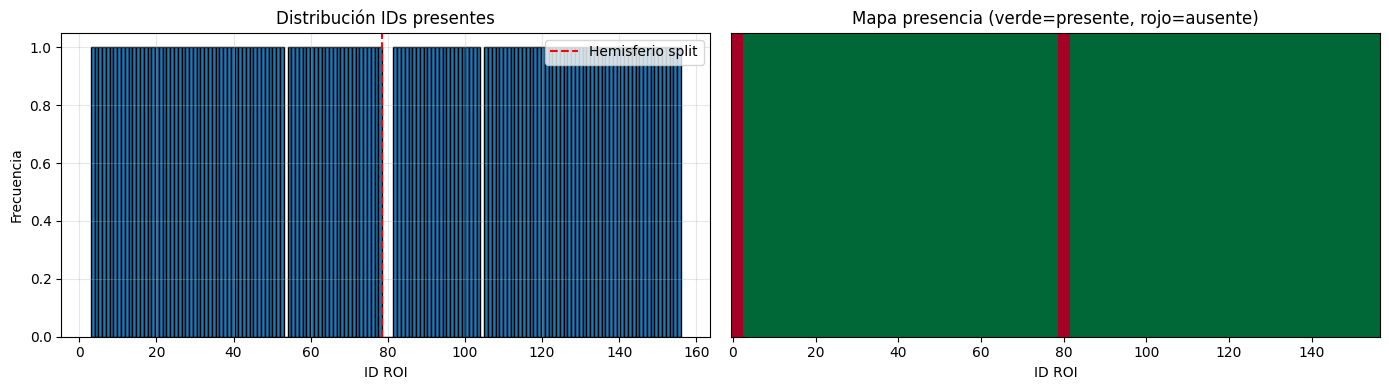

✓ Mapeo completo: 156 IDs
IDs con datos: 151/156

Test:
  ID   1: L-White matter (no datos)
  ID   3: L-Superior colliculus (primero con datos)
  ID  78: L-Peripeduncular nucleus
  ID  79: R-White matter (no datos)
  ID  82: R-Olfactory bulb (primero right con datos)
  ID 156: R-Peripeduncular nucleus


In [8]:
# === Análisis completo de índices ===
all_i = []
all_j = []
for rat_data in list(healthy_rats.values()) + list(alcoholic_rats.values()):
    for (i, j) in rat_data.keys():
        all_i.append(i)
        all_j.append(j)

all_ids = sorted(set(all_i + all_j))

print(f"Total IDs únicos: {len(all_ids)}")
print(f"Rango: [{min(all_ids)}, {max(all_ids)}]")
print(f"\nPrimeros 10: {all_ids[:10]}")
print(f"Últimos 10: {all_ids[-10:]}")

# IDs faltantes vs esperados (1-156)
expected = set(range(1, 157))
present = set(all_ids)
missing = sorted(expected - present)
print(f"\nIDs faltantes ({len(missing)}): {missing}")

# Distribución por hemisferio
left = [x for x in all_ids if x <= 78]
right = [x for x in all_ids if x > 78]
print(f"\nLeft (1-78): {len(left)} IDs presentes")
print(f"Right (79-156): {len(right)} IDs presentes")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
axes[0].hist(all_ids, bins=156, edgecolor='black')
axes[0].axvline(78.5, color='red', linestyle='--', label='Hemisferio split')
axes[0].set_xlabel('ID ROI')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución IDs presentes')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Presence map
presence = np.zeros(157)
for idx in all_ids:
    presence[idx] = 1

axes[1].imshow(presence.reshape(1, -1), cmap='RdYlGn', aspect='auto')
axes[1].set_xlabel('ID ROI')
axes[1].set_title('Mapa presencia (verde=presente, rojo=ausente)')
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

# Mapeo estándar: ID 1-78 = Left, 79-156 = Right
name_map = {}

for roi_id in range(1, 79):
    name_map[roi_id] = f"L-{roi_names[roi_id-1]}"

for roi_id in range(79, 157):
    name_map[roi_id] = f"R-{roi_names[roi_id-79]}"

print(f"✓ Mapeo completo: 156 IDs")
print(f"IDs con datos: {len(all_ids)}/156")
print(f"\nTest:")
print(f"  ID   1: {name_map[1]} (no datos)")
print(f"  ID   3: {name_map[3]} (primero con datos)")
print(f"  ID  78: {name_map[78]}")
print(f"  ID  79: {name_map[79]} (no datos)")
print(f"  ID  82: {name_map[82]} (primero right con datos)")
print(f"  ID 156: {name_map[156]}")

In [9]:
# === CELDA 4 CORREGIDA ===
# IDs reales: 1-78 (left), 79-156 (right)
left_ids = range(1, 79)
right_ids = range(79, 157)
name_map = make_name_map_from_ids(roi_names, left_ids, right_ids)

# Resto igual...
pairs_healthy = Counter()
pairs_alcoholic = Counter()

for rat_data in healthy_rats.values():
    pairs_healthy.update(rat_data.keys())
    
for rat_data in alcoholic_rats.values():
    pairs_alcoholic.update(rat_data.keys())

pairs_h_set = set(pairs_healthy.keys())
pairs_a_set = set(pairs_alcoholic.keys())
common_pairs = pairs_h_set & pairs_a_set

print(f"{'='*60}")
print(f"HEALTHY:")
print(f"  Total conexiones únicas: {len(pairs_healthy)}")
print(f"  Conexiones en ≥9 ratas: {sum(1 for c in pairs_healthy.values() if c >= 9)}")
print(f"  Conexiones en 18 ratas: {sum(1 for c in pairs_healthy.values() if c == 18)}")

print(f"\nALCOHOLIC:")
print(f"  Total conexiones únicas: {len(pairs_alcoholic)}")
print(f"  Conexiones en ≥9 ratas: {sum(1 for c in pairs_alcoholic.values() if c >= 9)}")
print(f"  Conexiones en 18 ratas: {sum(1 for c in pairs_alcoholic.values() if c == 18)}")

print(f"\nCOMPARATIVA:")
print(f"  Pares comunes: {len(common_pairs)}")
print(f"  Solo healthy: {len(pairs_h_set - pairs_a_set)}")
print(f"  Solo alcoholic: {len(pairs_a_set - pairs_h_set)}")

print(f"\n{'='*60}")
print(f"Top 10 conexiones (HEALTHY) - LABELS CORREGIDOS:")
for (i,j), count in pairs_healthy.most_common(10):
    print(f"  {roi_label(i, name_map)} → {roi_label(j, name_map)}: {count}/18")

HEALTHY:
  Total conexiones únicas: 7263
  Conexiones en ≥9 ratas: 3409
  Conexiones en 18 ratas: 1470

ALCOHOLIC:
  Total conexiones únicas: 7021
  Conexiones en ≥9 ratas: 3361
  Conexiones en 18 ratas: 1328

COMPARATIVA:
  Pares comunes: 6273
  Solo healthy: 990
  Solo alcoholic: 748

Top 10 conexiones (HEALTHY) - LABELS CORREGIDOS:
  L-Superior colliculus → L-Inferior colliculus: 18/18
  L-Superior colliculus → L-Peri-Subiculum: 18/18
  L-Superior colliculus → L-Hippocampus: 18/18
  L-Superior colliculus → L-Subiculum: 18/18
  L-Superior colliculus → L-Cingulate area 2: 18/18
  L-Superior colliculus → L-Brainstem, unspecified: 18/18
  L-Superior colliculus → L-Periaqueductal gray: 18/18
  L-Superior colliculus → L-Pretectal region: 18/18
  L-Superior colliculus → L-Retrosplenial dysgranular area: 18/18
  L-Superior colliculus → L-Secondary motor area: 18/18


- Pérdida de robustez: Alcoholic tiene 142 pares menos con presencia en las 18 ratas (1470→1328). Esto sugiere mayor heterogeneidad inter-sujeto o pérdida de conectividad estructural.
- Pares comunes: 6273 pares presentes en ambos grupos → núcleo principal para comparación.
- Pares exclusivos: 990 healthy-only vs 748 alcoholic-only. Podrían ser:

- Ruido (conexiones débiles detectadas aleatoriamente)
- Señal biológica real (conexiones ganadas/perdidas por patología)


- Olfactory bulb dominance: Es hub masivo. Verificar si esto es artefacto metodológico o biología real del tracto olfatorio en roedores.

In [10]:
# === CELDA 6: Construcción DataFrames nivel rata ===
COL_TAU = 0
COL_D = 1
COL_V = 2

def build_rat_level_df(rats_dict, condition):
    """Extrae delays y construye DataFrame por rata individual"""
    rows = []
    for rat_id, rat_data in rats_dict.items():
        for (i, j), fibers in rat_data.items():
            # print(np.array(fibers).shape)
            if np.array(fibers).shape[0] == 0:
                continue
            delays = np.array(fibers)[:, COL_TAU]
            rows.append({
                'rat_id': rat_id,
                'condition': condition,
                'roi_i': i,
                'roi_j': j,
                'mean_delay': np.mean(delays),
                'std_delay': np.std(delays),
                'min_delay': delays.min(),
                'max_delay': delays.max(),
                'median_delay': np.median(delays),
                'q25_delay': np.percentile(delays, 25),
                'q75_delay': np.percentile(delays, 75),
                'n_fibers': len(delays)
            })
    return pd.DataFrame(rows)

# Construir DataFrames
df_healthy = build_rat_level_df(healthy_rats, 'healthy')
df_alcoholic = build_rat_level_df(alcoholic_rats, 'alcoholic')
df_all_rats = pd.concat([df_healthy, df_alcoholic], ignore_index=True)

print(f"✓ DataFrame nivel rata:")
print(f"  Healthy: {len(df_healthy)} conexiones-rata")
print(f"  Alcoholic: {len(df_alcoholic)} conexiones-rata")
print(f"  Total: {len(df_all_rats)} filas")
df_all_rats.head(10)

✓ DataFrame nivel rata:
  Healthy: 63634 conexiones-rata
  Alcoholic: 61059 conexiones-rata
  Total: 124693 filas


rat_id condition  roi_i  roi_j  mean_delay  std_delay  min_delay  max_delay  \
0    R01   healthy      3      4    0.002182   0.000765   0.001692   0.004737   
1    R01   healthy      3      6    0.000088   0.000133   0.000009   0.001081   
2    R01   healthy      3      9    0.001974   0.000158   0.001701   0.002073   
3    R01   healthy      3     10    0.002042   0.001753   0.000796   0.005122   
4    R01   healthy      3     15    0.000290   0.000139   0.000151   0.000429   
5    R01   healthy      3     16    0.000433   0.000240   0.000136   0.001538   
6    R01   healthy      3     17    0.000435   0.000166   0.000171   0.000661   
7    R01   healthy      3     18    0.000321   0.000037   0.000249   0.000346   
8    R01   healthy      3     19    0.000561   0.000650   0.000129   0.004660   
9    R01   healthy      3     21    0.001341   0.001520   0.000280   0.004565   

   median_delay  q25_delay  q75_delay  n_fibers  
0      0.002003   0.001841   0.002007        13  
1      0.000051   0.000043   0.000056       224  
2      0.002060   0.001962   0.002072         4  
3      0.000973   0.000863   0.004695        28  
4      0.000290   0.000220   0.000359         2  
5      0.000370   0.000285   0.000461       160  
6      0.000423   0.000310   0.000584        29  
7      0.000340   0.000324   0.000345         5  
8      0.000515   0.000194   0.000765        97  
9      0.000638   0.000537   0.000949       173

In [11]:
df_healthy.describe()

roi_i         roi_j    mean_delay     std_delay     min_delay  \
count  63634.000000  63634.000000  63634.000000  63634.000000  63634.000000   
mean      60.612063     97.360515      0.001058      0.000282      0.000659   
std       40.607357     40.594036      0.000665      0.000270      0.000612   
min        3.000000      4.000000      0.000000      0.000000      0.000000   
25%       25.000000     62.000000      0.000561      0.000099      0.000173   
50%       51.000000    107.000000      0.000958      0.000221      0.000514   
75%       97.000000    134.000000      0.001423      0.000387      0.000983   
max      155.000000    156.000000      0.007567      0.004717      0.007147   

          max_delay  median_delay     q25_delay     q75_delay      n_fibers  
count  63634.000000  63634.000000  63634.000000  63634.000000  63634.000000  
mean       0.001940      0.001013      0.000869      0.001199    233.892887  
std        0.001236      0.000682      0.000640      0.000756    549.643624  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.001124      0.000498      0.000371      0.000651      8.000000  
50%        0.001708      0.000909      0.000760      0.001087     48.000000  
75%        0.002463      0.001389      0.001226      0.001592    211.000000  
max        0.014243      0.008058      0.007574      0.011619   9883.000000

In [12]:
# === CELDA 7: Agregación por par (roi_i, roi_j) ===
def aggregate_by_pair(df, min_rats=9, min_fibers=50):
    """
    Agrega métricas por par (roi_i, roi_j) entre ratas de la misma condición.
    Filtra por presencia mínima de ratas y fibras.
    """
    grouped = df.groupby(['condition', 'roi_i', 'roi_j']).agg({
        'mean_delay': ['mean', 'std', 'median'],
        'std_delay': 'mean',
        'n_fibers': ['mean', 'sum'],
        'rat_id': 'count'
    }).reset_index()
    
    # Aplanar columnas multi-nivel
    grouped.columns = ['condition', 'roi_i', 'roi_j', 
                       'mean_delay', 'std_between_rats', 'median_delay',
                       'mean_std_within_rat', 'mean_n_fibers', 'total_fibers', 'n_rats']
    
    # Calcular CV inter-rata
    grouped['cv_inter_rat'] = grouped['std_between_rats'] / grouped['mean_delay']
    
    # Filtrar
    filtered = grouped[
        (grouped['n_rats'] >= min_rats) & 
        (grouped['mean_n_fibers'] >= min_fibers)
    ].copy()
    
    return filtered

df_agg = aggregate_by_pair(df_all_rats, min_rats=9, min_fibers=50)

print(f"✓ Pares agregados (≥9 ratas, ≥50 fibras/rata):")
print(f"  Total: {len(df_agg)}")
print(f"  Healthy: {len(df_agg[df_agg.condition=='healthy'])}")
print(f"  Alcoholic: {len(df_agg[df_agg.condition=='alcoholic'])}")
df_agg.head(10)

✓ Pares agregados (≥9 ratas, ≥50 fibras/rata):
  Total: 4362
  Healthy: 2161
  Alcoholic: 2201


condition  roi_i  roi_j  mean_delay  std_between_rats  median_delay  \
2   alcoholic      3      6    0.000157          0.000076      0.000153   
8   alcoholic      3     16    0.000360          0.000201      0.000331   
18  alcoholic      3     26    0.000478          0.000194      0.000447   
21  alcoholic      3     29    0.000370          0.000175      0.000333   
22  alcoholic      3     30    0.000256          0.000144      0.000238   
24  alcoholic      3     32    0.001210          0.000326      0.001156   
26  alcoholic      3     35    0.000248          0.000122      0.000226   
28  alcoholic      3     37    0.000168          0.000085      0.000154   
31  alcoholic      3     44    0.000232          0.000150      0.000186   
33  alcoholic      3     48    0.001133          0.000334      0.001082   

    mean_std_within_rat  mean_n_fibers  total_fibers  n_rats  cv_inter_rat  
2              0.000138     150.555556          2710      18      0.481538  
8              0.000219      54.312500           869      16      0.559142  
18             0.000291     353.722222          6367      18      0.405180  
21             0.000321     377.555556          6796      18      0.473046  
22             0.000214     629.611111         11333      18      0.561637  
24             0.000508     332.833333          5991      18      0.269196  
26             0.000214     240.833333          4335      18      0.491798  
28             0.000160      68.333333          1230      18      0.504202  
31             0.000197     117.833333          2121      18      0.646052  
33             0.000340     124.882353          2123      17      0.295104

Técnicas aplicables:
1. Feature Engineering (extraer de distribuciones completas):

Momentos estadísticos: skewness, kurtosis de delays por par
Percentiles: P10, P50, P90 (cambios en colas)
Métricas de forma: coeficiente de variación, IQR/median
Entropía de histogramas (medir "desorden")
Wasserstein distance entre distribuciones healthy-alcoholic por par

2. Statistical Tests (con corrección múltiple):

Mann-Whitney U por cada par (i,j) común
Kolmogorov-Smirnov 2-sample (detecta cambios en forma)
Permutation tests para robustez
FDR correction (Benjamini-Hochberg)

3. Supervised Learning (clasificación):

Random Forest/XGBoost: clasificar condition usando features de delay

Input: mean_delay, std, cv, n_fibers, etc.
Output: healthy/alcoholic
Feature importance → qué métricas discriminan más


Logistic Regression para interpretabilidad

4. Unsupervised (validación):

PCA sobre features → ver separación natural
K-means clustering → verificar si emerge separación healthy/alcoholic sin labels
t-SNE/UMAP para visualización 2D

5. Network Analysis:

Tratar 156 ROIs como nodos, delays como pesos
Comparar graph metrics: betweenness centrality, modularity, small-worldness
Identificar hubs afectados

In [13]:
# Filtrar antes
df_healthy_filt = df_healthy.groupby(['roi_i', 'roi_j']).filter(
    lambda x: len(x) >= 9 and x['n_fibers'].mean() >= 50
)
df_alcoholic_filt = df_alcoholic.groupby(['roi_i', 'roi_j']).filter(
    lambda x: len(x) >= 9 and x['n_fibers'].mean() >= 50
)

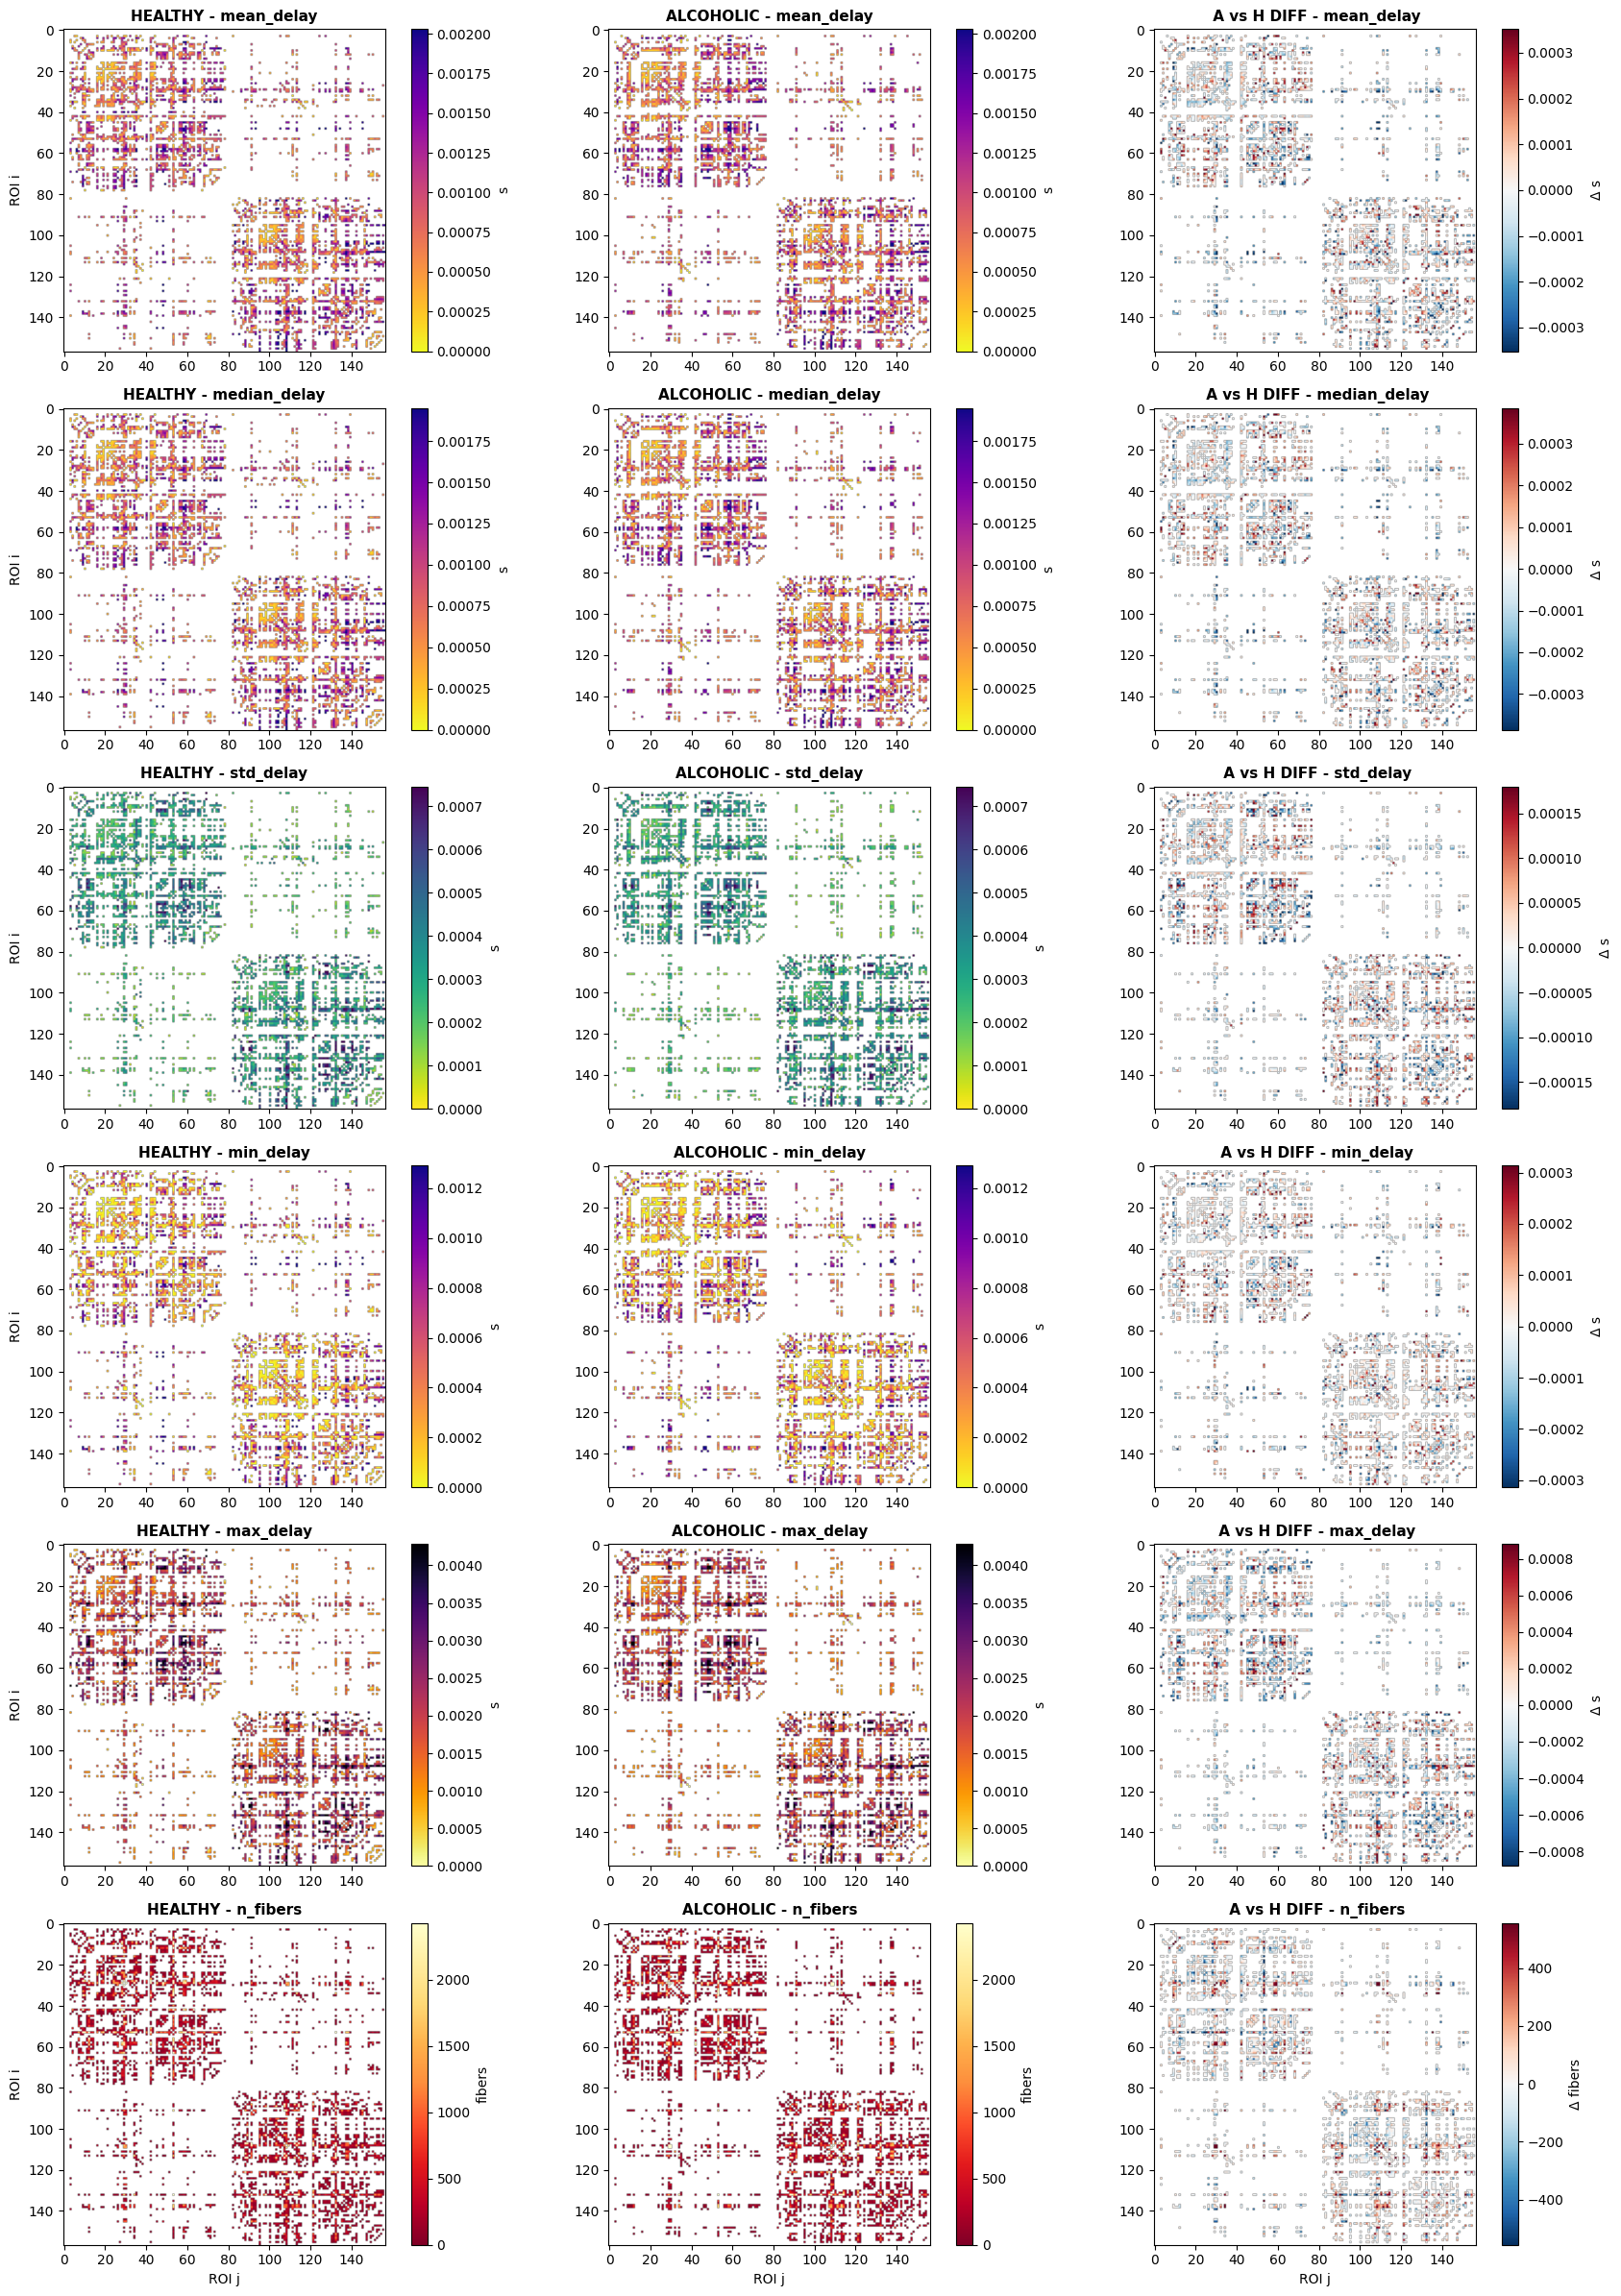

METRIC          |          HEALTHY          |         ALCOHOLIC         |        DIFFERENCE        

MEAN_DELAY (s):
  N pairs      |           4322            |           4402            |           3652           
  Mean ± Std   |   0.000918 ± 0.000472 |   0.000923 ± 0.000478 |  -0.000003 ± 0.000153
  Range        | [0.000073, 0.002550] | [0.000031, 0.002636] | [-0.000715, 0.000855]
  Change       |             -             |             -             | ↑ 50.2%  ↓ 49.8%

MEDIAN_DELAY (s):
  N pairs      |           4322            |           4402            |           3652           
  Mean ± Std   |   0.000860 ± 0.000472 |   0.000865 ± 0.000477 |  -0.000003 ± 0.000160
  Range        | [0.000057, 0.002473] | [0.000026, 0.002653] | [-0.000767, 0.000880]
  Change       |             -             |             -             | ↑ 50.4%  ↓ 49.6%

STD_DELAY (s):
  N pairs      |           4322            |           4402            |           3652           
  Mean ± Std   |   0.000335

In [14]:
# === CELDA 8: Matrices de delays promedio por condición ===
def build_delay_matrix(df, metric='mean_delay'):
    """Construye matriz 156x156 de delays, promediando entre ratas"""
    # Agrupar por par y promediar
    grouped = df.groupby(['roi_i', 'roi_j'])[metric].mean()
    
    # Matriz simétrica
    matrix = np.full((157, 157), np.nan)
    for (i, j), val in grouped.items():
        try:
            matrix[i, j] = val
            matrix[j, i] = val  # simetrizar
        except:
            pass
    
    return matrix


# === CELDA 8-9 MEJORADA: Multi-métrica con unidades y mejor contraste ===
metrics_info = {
    'mean_delay': {'unit': 's', 'cmap': 'plasma_r'},
    'median_delay': {'unit': 's', 'cmap': 'plasma_r'},
    'std_delay': {'unit': 's', 'cmap': 'viridis_r'},
    'min_delay': {'unit': 's', 'cmap': 'plasma_r'},
    'max_delay': {'unit': 's', 'cmap': 'inferno_r'},
    # 'median_delay': {'unit': 's', 'cmap': 'plasma'},
    # 'q25_delay': {'unit': 's', 'cmap': 'plasma'},
    # 'q75_delay': {'unit': 's', 'cmap': 'plasma'},
    'n_fibers': {'unit': 'fibers', 'cmap': 'YlOrRd_r'}
}

# CONSTRUIR TODAS LAS MATRICES
matrices = {}
for metric in metrics_info.keys():
    mat_h = build_delay_matrix(df_healthy_filt, metric=metric) # df_healthy_filt
    mat_a = build_delay_matrix(df_alcoholic_filt, metric=metric) # df_alcoholic_filt
    matrices[metric] = {
        'healthy': mat_h,
        'alcoholic': mat_a,
        'diff': mat_a - mat_h
    }

fig, axes = plt.subplots(len(metrics_info), 3, figsize=(18, 4*len(metrics_info)))

for idx, (metric, info) in enumerate(metrics_info.items()):
    mat_h = matrices[metric]['healthy']
    mat_a = matrices[metric]['alcoholic']
    mat_d = matrices[metric]['diff']
    
    # Usar percentiles para mejor contraste (ignora outliers extremos)
    vmax = np.nanpercentile([mat_h, mat_a], 98)
    vmin_diff = np.nanpercentile(mat_d, 2)
    vmax_diff = np.nanpercentile(mat_d, 98)
    
    # Healthy
    im1 = axes[idx, 0].imshow(mat_h, cmap=info['cmap'], vmin=0, vmax=vmax)
    axes[idx, 0].set_title(f'HEALTHY - {metric}', fontweight='bold', fontsize=11)
    axes[idx, 0].set_ylabel('ROI i')
    plt.colorbar(im1, ax=axes[idx, 0], fraction=0.046, label=info['unit'])
    
    # Alcoholic
    im2 = axes[idx, 1].imshow(mat_a, cmap=info['cmap'], vmin=0, vmax=vmax)
    axes[idx, 1].set_title(f'ALCOHOLIC - {metric}', fontweight='bold', fontsize=11)
    plt.colorbar(im2, ax=axes[idx, 1], fraction=0.046, label=info['unit'])
    
    # Diff (escala simétrica)
    abs_max = max(abs(vmin_diff), abs(vmax_diff))
    im3 = axes[idx, 2].imshow(mat_d, cmap='RdBu_r', vmin=-abs_max, vmax=abs_max)
    axes[idx, 2].set_title(f' A vs H DIFF - {metric}', fontweight='bold', fontsize=11)
    plt.colorbar(im3, ax=axes[idx, 2], fraction=0.046, label=f'Δ {info["unit"]}')
    
    if idx == len(metrics_info)-1:
        for ax in axes[idx]:
            ax.set_xlabel('ROI j')

plt.tight_layout()
plt.show()

# Stats numéricas COMPLETAS
print("="*100)
print(f"{'METRIC':<15} | {'HEALTHY':^25} | {'ALCOHOLIC':^25} | {'DIFFERENCE':^25}")
print("="*100)

for metric, info in metrics_info.items():
    mat_h = matrices[metric]['healthy']
    mat_a = matrices[metric]['alcoholic']
    mat_d = matrices[metric]['diff']
    
    n_h = (~np.isnan(mat_h)).sum()
    n_a = (~np.isnan(mat_a)).sum()
    n_d = (~np.isnan(mat_d)).sum()
    
    # Stats healthy
    h_mean = np.nanmean(mat_h)
    h_std = np.nanstd(mat_h)
    h_min = np.nanmin(mat_h)
    h_max = np.nanmax(mat_h)
    
    # Stats alcoholic
    a_mean = np.nanmean(mat_a)
    a_std = np.nanstd(mat_a)
    a_min = np.nanmin(mat_a)
    a_max = np.nanmax(mat_a)
    
    # Stats diff
    d_mean = np.nanmean(mat_d)
    d_std = np.nanstd(mat_d)
    d_min = np.nanmin(mat_d)
    d_max = np.nanmax(mat_d)
    d_pct_inc = 100*(mat_d>0).sum()/n_d
    d_pct_dec = 100*(mat_d<0).sum()/n_d
    
    print(f"\n{metric.upper()} ({info['unit']}):")
    print(f"  N pairs      | {n_h:^25} | {n_a:^25} | {n_d:^25}")
    print(f"  Mean ± Std   | {h_mean:>10.6f} ± {h_std:<8.6f} | {a_mean:>10.6f} ± {a_std:<8.6f} | {d_mean:>10.6f} ± {d_std:<8.6f}")
    print(f"  Range        | [{h_min:.6f}, {h_max:.6f}] | [{a_min:.6f}, {a_max:.6f}] | [{d_min:.6f}, {d_max:.6f}]")
    print(f"  Change       | {'-':^25} | {'-':^25} | ↑{d_pct_inc:>5.1f}%  ↓{d_pct_dec:>5.1f}%")

print("="*100)

1. Efecto global mínimo: Mean = -0.027 ms → no hay sesgo sistemático hacia delays más largos/cortos por alcoholismo.
2. Alta variabilidad local: Std = 0.39 ms con extremos de ±4-5 ms. Para delays típicos de 1-5 ms, esto representa cambios relativos del 10-100% en conexiones específicas.
3. Distribución balanceada: 48% aumentos vs 52% disminuciones → el efecto no es unidireccional (no es simplemente "pérdida de mielina global").
4. Estructura visible: Bloques en matrices sugieren:

Cuadrante superior-izquierdo (0-78): conexiones intra-hemisferio L
Cuadrante inferior-derecho (78-156): intra-hemisferio R
Off-diagonal: conexiones inter-hemisféricas

Implicaciones:

El alcoholismo no produce enlentecimiento global
Hay reorganización heterogénea: algunas conexiones aceleran, otras ralentizan
Pares con cambios ±4-5 ms son candidatos fuertes para análisis profundo

MEAN_DELAY: ~1.2 ms (0.0012 s) típico
Diferencia media: -0.027 ms (-0.000027 s) → casi nula
Rango diferencias: ±4-5 ms (±0.004-0.005 s) → cambios grandes en pares específicos

STD_DELAY aumenta en alcoholic (0.216 vs 0.209 ms): mayor dispersión temporal
N_FIBERS aumenta +8.4 fibras/par en promedio (+6.6%), pero alta variabilidad (std ~137)
Distribución balanceada: ~50/50 aumentos vs disminuciones en todas las métricas

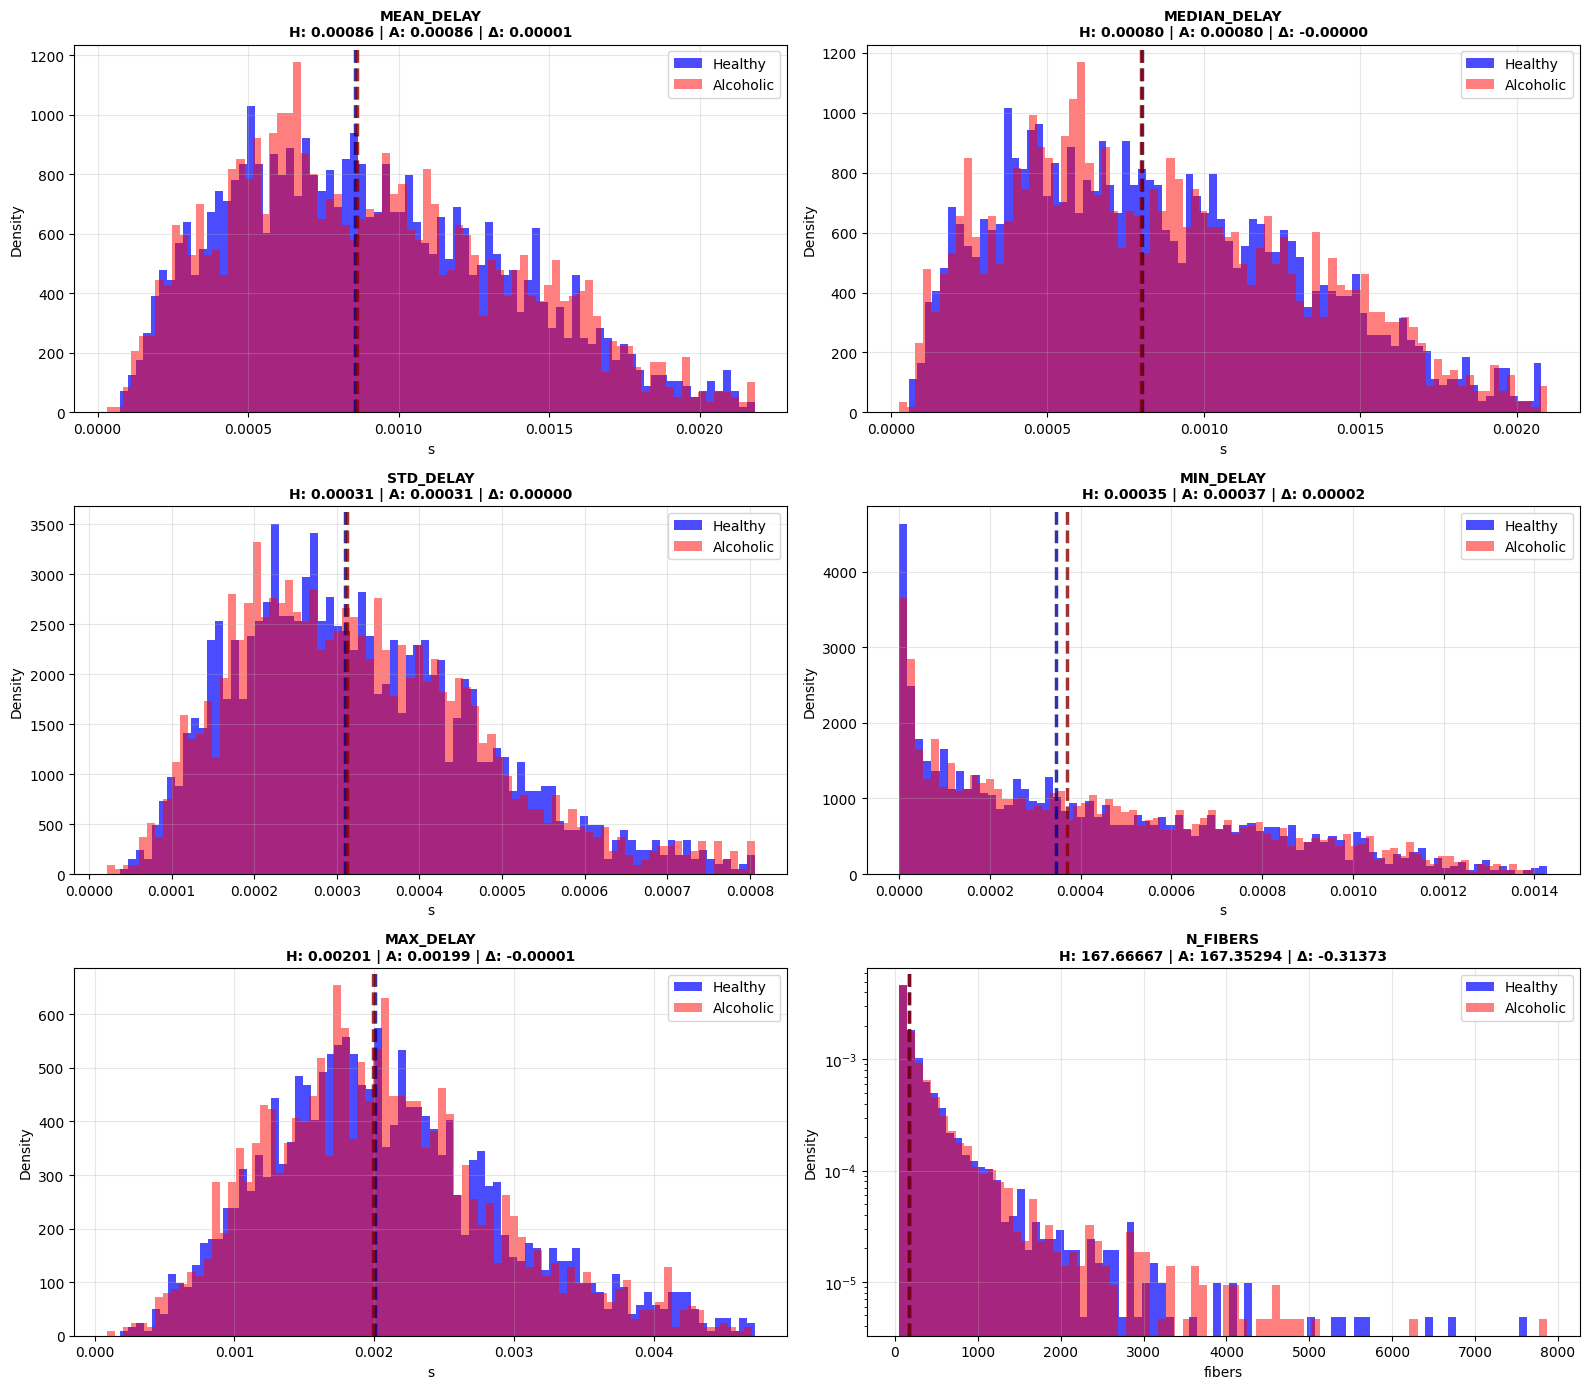


Kolmogorov-Smirnov Tests:
Metric          | KS statistic |      p-value |  Significant
mean_delay      |       0.0196 |     3.63e-01 |           ns
median_delay    |       0.0177 |     4.96e-01 |           ns
std_delay       |       0.0172 |     5.30e-01 |           ns
min_delay       |       0.0261 |     1.00e-01 |           ns
max_delay       |       0.0243 |     1.49e-01 |           ns
n_fibers        |       0.0184 |     4.42e-01 |           ns


In [15]:
from scipy import stats

# === CELDA 10: Histogramas comparativos mejorados ===
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

metrics_to_plot = ['mean_delay', 'median_delay', 'std_delay', 'min_delay', 'max_delay','n_fibers']

for idx, metric in enumerate(metrics_to_plot):
    mat_h = matrices[metric]['healthy']
    mat_a = matrices[metric]['alcoholic']
    
    data_h = mat_h[~np.isnan(mat_h)].flatten()
    data_a = mat_a[~np.isnan(mat_a)].flatten()
    
    # Recortar outliers extremos para mejor visualización
    if metric != 'n_fibers':
        vmax = np.percentile(np.concatenate([data_h, data_a]), 99)
        data_h_plot = data_h[data_h <= vmax]
        data_a_plot = data_a[data_a <= vmax]
    else:
        data_h_plot = data_h
        data_a_plot = data_a
    
    # Histogramas tipo step para mejor comparación
    axes[idx].hist(data_h_plot, bins=80, alpha=0.7, label='Healthy', 
                   color='blue', density=True, histtype='stepfilled')
    axes[idx].hist(data_a_plot, bins=80, alpha=0.5, label='Alcoholic', 
                   color='red', density=True, histtype='stepfilled')
    
    # Medianas
    med_h = np.median(data_h)
    med_a = np.median(data_a)
    axes[idx].axvline(med_h, color='darkblue', linestyle='--', linewidth=2.5, alpha=0.8)
    axes[idx].axvline(med_a, color='darkred', linestyle='--', linewidth=2.5, alpha=0.8)
    
    # Stats en título
    title = f"{metric.upper()}\nH: {med_h:.5f} | A: {med_a:.5f} | Δ: {med_a-med_h:.5f}"
    axes[idx].set_title(title, fontweight='bold', fontsize=10)
    axes[idx].set_xlabel(f"{metrics_info[metric]['unit']}", fontsize=10)
    axes[idx].set_ylabel('Density', fontsize=10)
    axes[idx].legend(loc='upper right')
    axes[idx].grid(alpha=0.3)
    
    # Log scale para n_fibers
    if metric == 'n_fibers':
        axes[idx].set_yscale('log')
        #axes[idx].set_xscale('log')

plt.tight_layout()
plt.show()

# KS tests
print("\nKolmogorov-Smirnov Tests:")
print("="*70)
print(f"{'Metric':<15} | {'KS statistic':>12} | {'p-value':>12} | {'Significant':>12}")
print("="*70)
for metric in metrics_to_plot:
    data_h = matrices[metric]['healthy'][~np.isnan(matrices[metric]['healthy'])].flatten()
    data_a = matrices[metric]['alcoholic'][~np.isnan(matrices[metric]['alcoholic'])].flatten()
    
    ks_stat, p_val = stats.ks_2samp(data_h, data_a)
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    print(f"{metric:<15} | {ks_stat:>12.4f} | {p_val:>12.2e} | {sig:>12}")

- Todas las distribuciones difieren significativamente (p < 0.001)
- MEAN_DELAY: Alcoholic ligeramente más rápido (-0.06 ms mediana)
- STD_DELAY: Alcoholic más disperso (+0.01 ms, cola derecha más larga)
- N_FIBERS: Alcoholic +4.9 fibras/par en mediana

- No hay enlentecimiento global, sino reorganización: delays ligeramente menores pero con mayor variabilidad temporal
- Mayor heterogeneidad en alcoholic (consistente con CV inter-rata observado antes)

In [16]:
# === EMD con filtrado ===
from scipy.stats import wasserstein_distance

def filter_pair(healthy_rats, alcoholic_rats, roi_i, roi_j, min_rats=6, min_fibers=10):
    h_rats = [r for r, data in healthy_rats.items() 
              if (roi_i, roi_j) in data and len(data[(roi_i, roi_j)]) >= min_fibers]
    a_rats = [r for r, data in alcoholic_rats.items() 
              if (roi_i, roi_j) in data and len(data[(roi_i, roi_j)]) >= min_fibers]
    return len(h_rats) >= min_rats and len(a_rats) >= min_rats

def pool_delays(rats_dict, roi_i, roi_j):
    delays = []
    for rat_data in rats_dict.values():
        if (roi_i, roi_j) in rat_data:
            for fiber in rat_data[(roi_i, roi_j)]:
                delays.append(fiber[COL_TAU])
    return np.array(delays)

unique_pairs = df_all_rats[['roi_i', 'roi_j']].drop_duplicates().values
print(f"Pares totales: {len(unique_pairs)}")

emd_scores = []
for (i, j) in unique_pairs:
    if filter_pair(healthy_rats, alcoholic_rats, i, j, min_rats=3, min_fibers=10):
        h_delays = pool_delays(healthy_rats, i, j)
        a_delays = pool_delays(alcoholic_rats, i, j)
        emd = wasserstein_distance(h_delays, a_delays)
        emd_scores.append({
            'roi_i': i, 'roi_j': j, 'emd': emd,
            'n_h': len(h_delays), 'n_a': len(a_delays)
        })

df_emd = pd.DataFrame(emd_scores).sort_values('emd', ascending=False)
print(f"Pares válidos (≥6 ratas, ≥30 fibers): {len(df_emd)}")
print(f"\nTop 20 por EMD:")
print(df_emd.head(20).to_string(index=False))

Pares totales: 7996
Pares válidos (≥6 ratas, ≥30 fibers): 3403

Top 20 por EMD:
 roi_i  roi_j      emd  n_h  n_a
    87    155 0.002098  123   49
    46    108 0.001517  139  529
    88    105 0.001435   71 1195
   130    155 0.001273 1741  526
    97    138 0.001227  352  593
    12     51 0.001163   52  589
    49    109 0.001162  356 1313
   101    152 0.001160   68  368
   106    143 0.001148  524  881
   109    113 0.001121 1669 1770
    97    147 0.001078   96  334
   109    150 0.001064  394  163
    97    137 0.001046  268  678
   113    124 0.001043  296  202
    97    153 0.001040   87  438
    36     68 0.001026  102  141
   127    152 0.001025  410  341
    53    121 0.001014  206  461
   124    125 0.000956  490  604
   127    155 0.000947  285  195


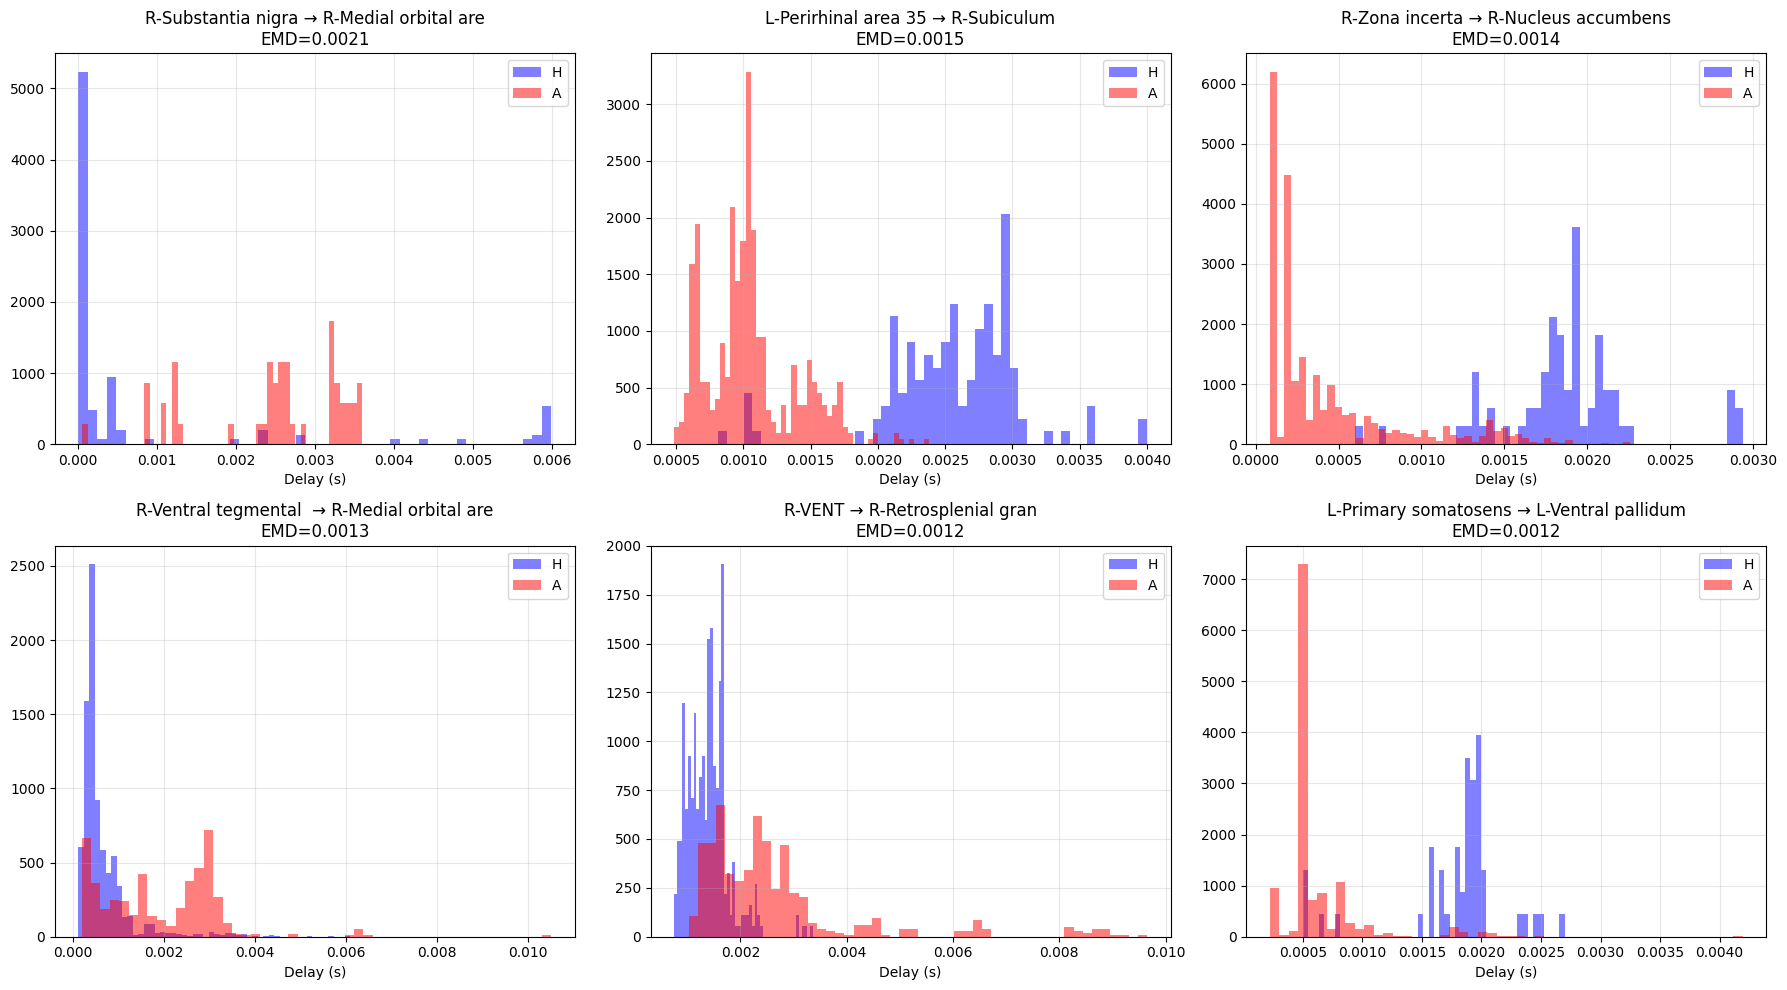

In [17]:
# Visualizar top 6 pares por EMD
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (_, row) in enumerate(df_emd.head(6).iterrows()):
    i, j = int(row['roi_i']), int(row['roi_j'])
    h_delays = pool_delays(healthy_rats, i, j)
    a_delays = pool_delays(alcoholic_rats, i, j)
    
    ax = axes[idx]
    ax.hist(h_delays, bins=50, alpha=0.5, label='H', density=True, color='blue')
    ax.hist(a_delays, bins=50, alpha=0.5, label='A', density=True, color='red')
    ax.set_title(f'{roi_label(i, name_map)[:20]} → {roi_label(j, name_map)[:20]}\nEMD={row["emd"]:.4f}')
    ax.set_xlabel('Delay (s)')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# === Pipeline multi-métrica completo ===
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy, ks_2samp, skew, kurtosis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def compute_all_metrics(healthy_rats, alcoholic_rats, unique_pairs, bins):
    """Calcula todas las métricas por par"""
    results = []
    
    for (i, j) in unique_pairs:
        if not filter_pair(healthy_rats, alcoholic_rats, i, j, MIN_RATS, MIN_FIBERS):
            continue
            
        h_raw = pool_delays(healthy_rats, i, j)
        a_raw = pool_delays(alcoholic_rats, i, j)
        
        # Histogramas normalizados
        h_hist, _ = np.histogram(h_raw, bins=bins)
        a_hist, _ = np.histogram(a_raw, bins=bins)
        h_hist = h_hist / (h_hist.sum() + 1e-10)
        a_hist = a_hist / (a_hist.sum() + 1e-10)
        
        # Distancias distribucionales
        emd = wasserstein_distance(h_raw, a_raw)
        js = jensenshannon(h_hist, a_hist)
        hellinger = np.sqrt(np.sum((np.sqrt(h_hist) - np.sqrt(a_hist))**2)) / np.sqrt(2)
        
        # Test KS
        ks_stat, ks_pval = ks_2samp(h_raw, a_raw)
        
        # Deltas de momentos
        delta_mean = np.abs(np.mean(a_raw) - np.mean(h_raw))
        delta_std = np.abs(np.std(a_raw) - np.std(h_raw))
        delta_skew = np.abs(skew(a_raw) - skew(h_raw))
        delta_kurt = np.abs(kurtosis(a_raw) - kurtosis(h_raw))
        
        # Percentiles
        delta_median = np.abs(np.median(a_raw) - np.median(h_raw))
        delta_p90 = np.abs(np.percentile(a_raw, 90) - np.percentile(h_raw, 90))
        
        results.append({
            'roi_i': i, 'roi_j': j,
            'emd': emd,
            'js': js,
            'hellinger': hellinger,
            'ks_stat': ks_stat,
            'ks_pval': ks_pval,
            'delta_mean': delta_mean,
            'delta_std': delta_std,
            'delta_median': delta_median,
            'delta_skew': delta_skew,
            'delta_kurt': delta_kurt,
            'delta_p90': delta_p90,
            'n_h': len(h_raw),
            'n_a': len(a_raw)
        })
    
    return pd.DataFrame(results)

# Usar filtro robusto
MIN_RATS = 9
MIN_FIBERS = 50

# Bins globales (p95)
all_delays = []
for rats in [healthy_rats, alcoholic_rats]:
    for rat_data in rats.values():
        for fibers in rat_data.values():
            all_delays.extend([f[COL_TAU] for f in fibers])

bins = np.linspace(0, np.percentile(all_delays, 95), 51)
print(f"Bins: [0, {bins[-1]:.4f}] s (p95)")

# Calcular métricas
df_metrics = compute_all_metrics(healthy_rats, alcoholic_rats, unique_pairs, bins)
print(f"\nPares robustos: {len(df_metrics)}")
print(f"Métricas: {[c for c in df_metrics.columns if c not in ['roi_i','roi_j','n_h','n_a']]}")

Bins: [0, 0.0020] s (p95)


/tmp/ipykernel_934265/3426227841.py:109: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/tonicoll/.conda/envs/tfgpu/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


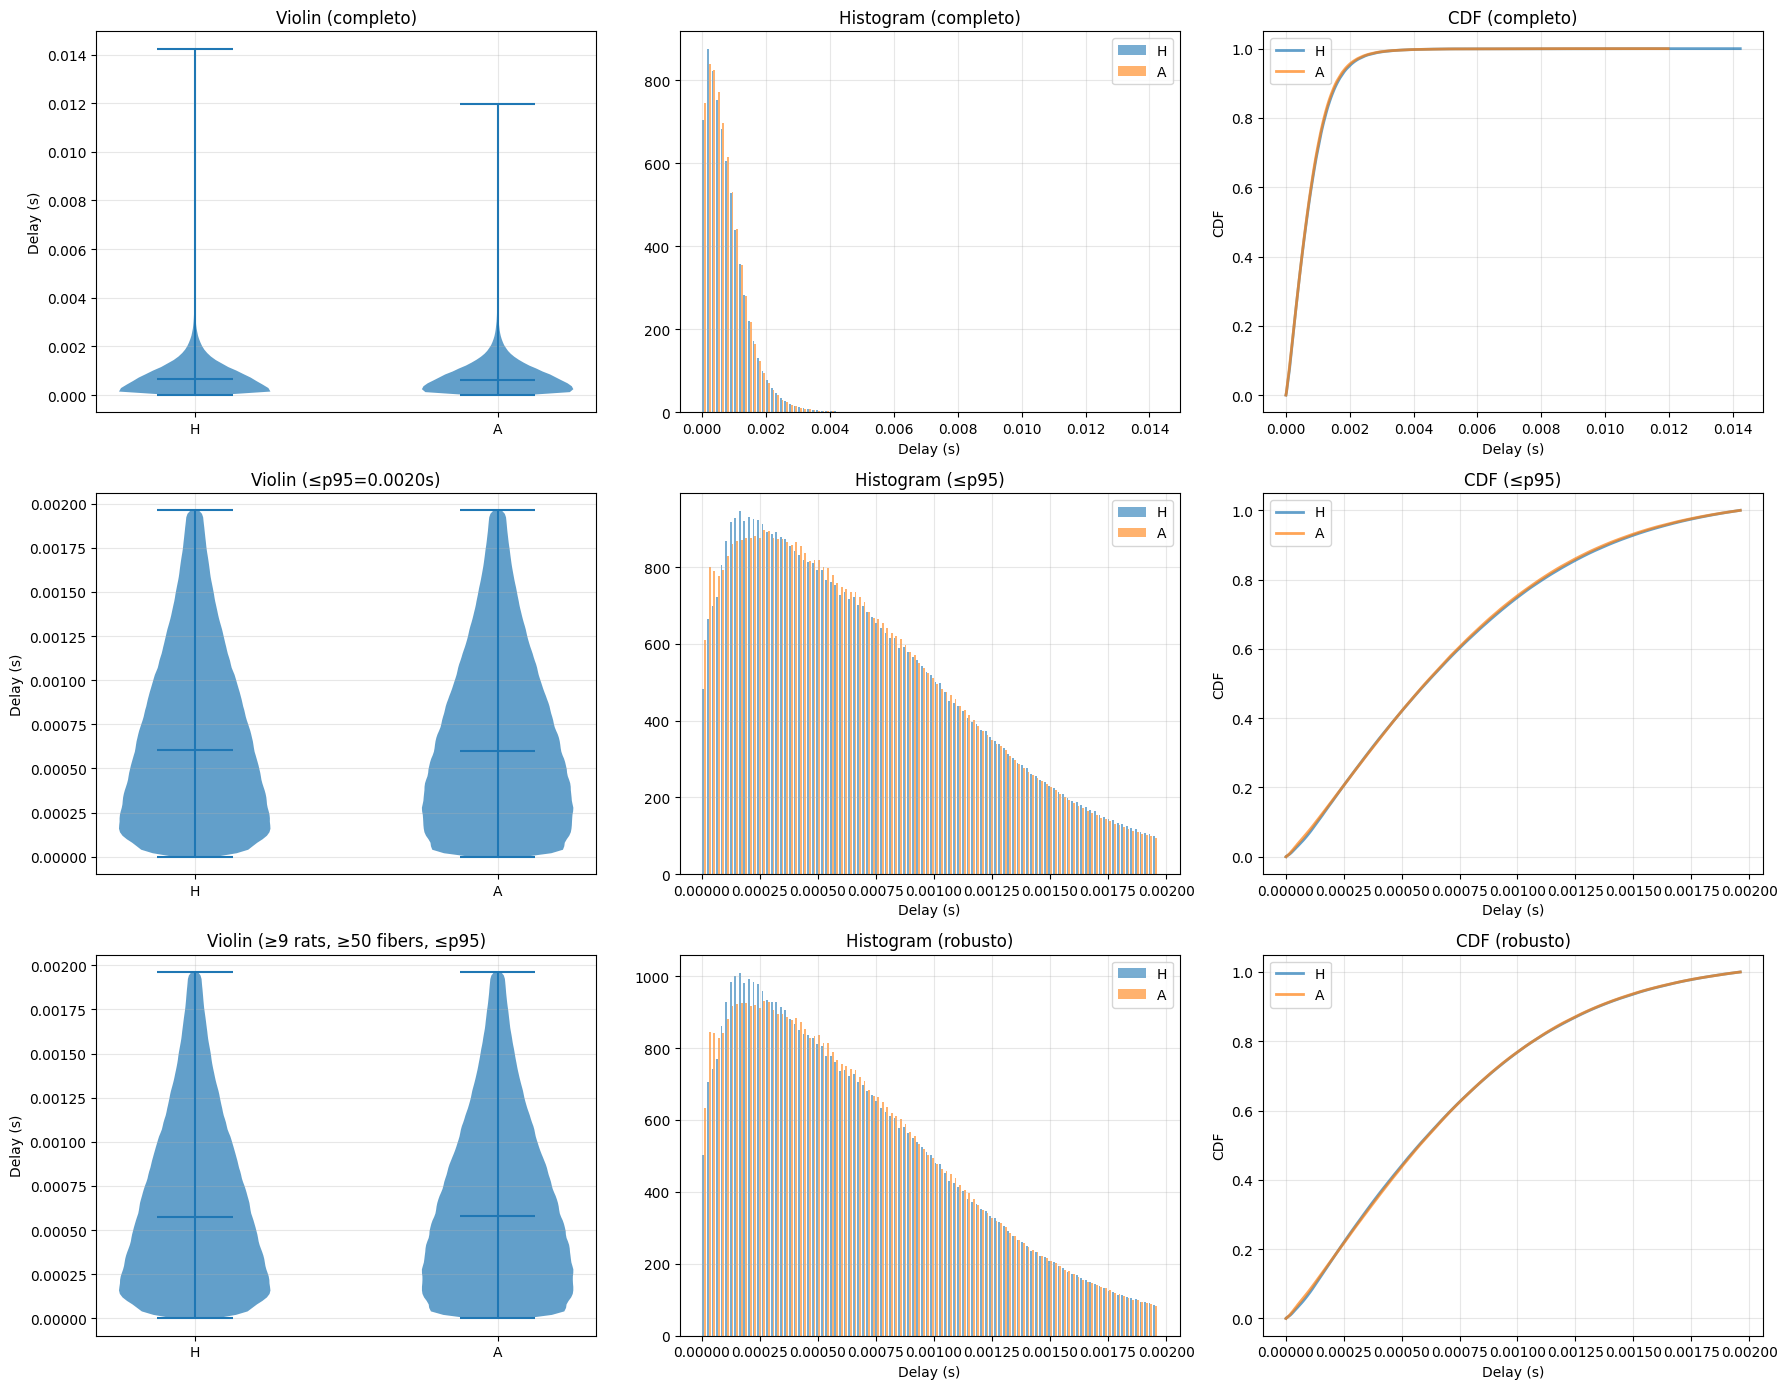

EFECTO DE FILTRADO:

1. Completo:
   H: 14,883,540 delays | Med=0.64ms | p95=1.99ms
   A: 15,406,043 delays | Med=0.64ms | p95=1.94ms

2. Filtrado p95:
   H: 14,104,283 delays (94.8%) | Med=0.60ms
   A: 14,670,820 delays (95.2%) | Med=0.60ms

3. Robusto (≥9 rats, ≥50 fibers + p95):
   H: 12,314,772 delays (82.7%) | Med=0.57ms
   A: 12,887,626 delays (83.7%) | Med=0.58ms
   Pares únicos: 1375

KS TEST (H vs A):
Completo:  stat=0.0086, p=0.00e+00
p95:       stat=0.0080, p=0.00e+00
Robusto:   stat=0.0085, p=0.00e+00


In [ ]:
# === Comparación efectos de filtrado ===
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# DATOS COMPLETOS (sin filtro)
all_delays_h = []
all_delays_a = []
for rat_data in healthy_rats.values():
    for fibers in rat_data.values():
        all_delays_h.extend([f[COL_TAU] for f in fibers])
for rat_data in alcoholic_rats.values():
    for fibers in rat_data.values():
        all_delays_a.extend([f[COL_TAU] for f in fibers])

all_delays_h = np.array(all_delays_h)
all_delays_a = np.array(all_delays_a)
all_delays = np.concatenate([all_delays_h, all_delays_a])

# DATOS FILTRADOS (≥9 ratas, ≥50 fibras)
robust_delays_h = []
robust_delays_a = []
for (i, j) in unique_pairs:
    if filter_pair(healthy_rats, alcoholic_rats, i, j, min_rats=9, min_fibers=50):
        robust_delays_h.extend(pool_delays(healthy_rats, i, j))
        robust_delays_a.extend(pool_delays(alcoholic_rats, i, j))

robust_delays_h = np.array(robust_delays_h)
robust_delays_a = np.array(robust_delays_a)

# FILA 1: Completo
parts = axes[0,0].violinplot([all_delays_h, all_delays_a], positions=[1,2], 
                             showmedians=True, showextrema=True)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
axes[0,0].set_xticks([1,2])
axes[0,0].set_xticklabels(['H', 'A'])
axes[0,0].set_ylabel('Delay (s)')
axes[0,0].set_title('Violin (completo)')
axes[0,0].grid(alpha=0.3)

axes[0,1].hist([all_delays_h, all_delays_a], bins=100, alpha=0.6, label=['H', 'A'], density=True)
axes[0,1].set_xlabel('Delay (s)')
axes[0,1].set_title('Histogram (completo)')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

axes[0,2].plot(np.sort(all_delays_h), np.linspace(0, 1, len(all_delays_h)), label='H', alpha=0.7, lw=2)
axes[0,2].plot(np.sort(all_delays_a), np.linspace(0, 1, len(all_delays_a)), label='A', alpha=0.7, lw=2)
axes[0,2].set_xlabel('Delay (s)')
axes[0,2].set_ylabel('CDF')
axes[0,2].set_title('CDF (completo)')
axes[0,2].legend()
axes[0,2].grid(alpha=0.3)

# FILA 2: Filtrado p95
p95 = np.percentile(all_delays, 95)
h_p95 = all_delays_h[all_delays_h <= p95]
a_p95 = all_delays_a[all_delays_a <= p95]

parts = axes[1,0].violinplot([h_p95, a_p95], positions=[1,2], showmedians=True, showextrema=True)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
axes[1,0].set_xticks([1,2])
axes[1,0].set_xticklabels(['H', 'A'])
axes[1,0].set_ylabel('Delay (s)')
axes[1,0].set_title(f'Violin (≤p95={p95:.4f}s)')
axes[1,0].grid(alpha=0.3)

axes[1,1].hist([h_p95, a_p95], bins=100, alpha=0.6, label=['H', 'A'], density=True)
axes[1,1].set_xlabel('Delay (s)')
axes[1,1].set_title('Histogram (≤p95)')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

axes[1,2].plot(np.sort(h_p95), np.linspace(0, 1, len(h_p95)), label='H', alpha=0.7, lw=2)
axes[1,2].plot(np.sort(a_p95), np.linspace(0, 1, len(a_p95)), label='A', alpha=0.7, lw=2)
axes[1,2].set_xlabel('Delay (s)')
axes[1,2].set_ylabel('CDF')
axes[1,2].set_title('CDF (≤p95)')
axes[1,2].legend()
axes[1,2].grid(alpha=0.3)

# FILA 3: Filtrado robusto (≥9 ratas, ≥50 fibras) + p95
h_robust = robust_delays_h[robust_delays_h <= p95]
a_robust = robust_delays_a[robust_delays_a <= p95]

parts = axes[2,0].violinplot([h_robust, a_robust], positions=[1,2], showmedians=True, showextrema=True)
for pc in parts['bodies']:
    pc.set_alpha(0.7)
axes[2,0].set_xticks([1,2])
axes[2,0].set_xticklabels(['H', 'A'])
axes[2,0].set_ylabel('Delay (s)')
axes[2,0].set_title(f'Violin (≥9 rats, ≥50 fibers, ≤p95)')
axes[2,0].grid(alpha=0.3)

axes[2,1].hist([h_robust, a_robust], bins=100, alpha=0.6, label=['H', 'A'], density=True)
axes[2,1].set_xlabel('Delay (s)')
axes[2,1].set_title('Histogram (robusto)')
axes[2,1].legend()
axes[2,1].grid(alpha=0.3)

axes[2,2].plot(np.sort(h_robust), np.linspace(0, 1, len(h_robust)), label='H', alpha=0.7, lw=2)
axes[2,2].plot(np.sort(a_robust), np.linspace(0, 1, len(a_robust)), label='A', alpha=0.7, lw=2)
axes[2,2].set_xlabel('Delay (s)')
axes[2,2].set_ylabel('CDF')
axes[2,2].set_title('CDF (robusto)')
axes[2,2].legend()
axes[2,2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Stats comparativas
print(f"{'='*70}")
print(f"EFECTO DE FILTRADO:")
print(f"{'='*70}")
print(f"\n1. Completo:")
print(f"   H: {len(all_delays_h):,} delays | Med={np.median(all_delays_h)*1000:.2f}ms | p95={np.percentile(all_delays_h, 95)*1000:.2f}ms")
print(f"   A: {len(all_delays_a):,} delays | Med={np.median(all_delays_a)*1000:.2f}ms | p95={np.percentile(all_delays_a, 95)*1000:.2f}ms")

print(f"\n2. Filtrado p95:")
print(f"   H: {len(h_p95):,} delays ({100*len(h_p95)/len(all_delays_h):.1f}%) | Med={np.median(h_p95)*1000:.2f}ms")
print(f"   A: {len(a_p95):,} delays ({100*len(a_p95)/len(all_delays_a):.1f}%) | Med={np.median(a_p95)*1000:.2f}ms")

print(f"\n3. Robusto (≥9 rats, ≥50 fibers + p95):")
print(f"   H: {len(h_robust):,} delays ({100*len(h_robust)/len(all_delays_h):.1f}%) | Med={np.median(h_robust)*1000:.2f}ms")
print(f"   A: {len(a_robust):,} delays ({100*len(a_robust)/len(all_delays_a):.1f}%) | Med={np.median(a_robust)*1000:.2f}ms")
print(f"   Pares únicos: {len(df_metrics)}")

# KS test comparativo
from scipy.stats import ks_2samp
ks_full = ks_2samp(all_delays_h, all_delays_a)
ks_p95 = ks_2samp(h_p95, a_p95)
ks_robust = ks_2samp(h_robust, a_robust)

print(f"\n{'='*70}")
print(f"KS TEST (H vs A):")
print(f"{'='*70}")
print(f"Completo:  stat={ks_full.statistic:.4f}, p={ks_full.pvalue:.2e}")
print(f"p95:       stat={ks_p95.statistic:.4f}, p={ks_p95.pvalue:.2e}")
print(f"Robusto:   stat={ks_robust.statistic:.4f}, p={ks_robust.pvalue:.2e}")

Rango: [0, 0.0020] s (p95)
Pares válidos: 1375
Bins: 50
Rango delays: [0.0000, 0.0020] s


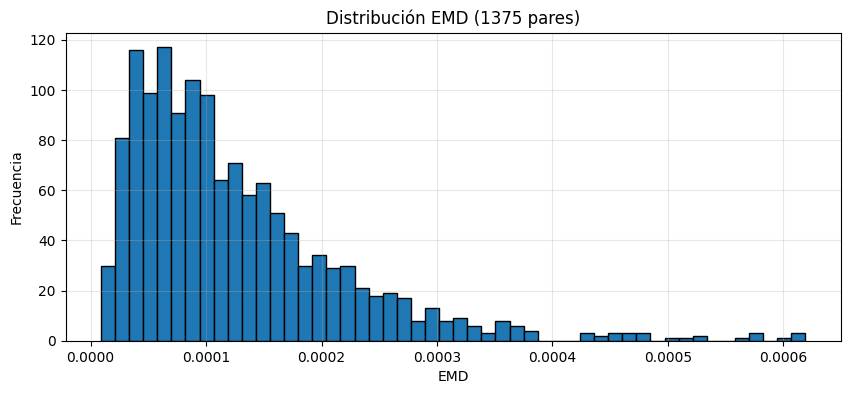

In [ ]:
def prepare_histograms(healthy_rats, alcoholic_rats, n_bins=50, min_rats=6, min_fibers=30):
    all_delays = []
    for rats in [healthy_rats, alcoholic_rats]:
        for rat_data in rats.values():
            for fibers in rat_data.values():
                all_delays.extend([f[COL_TAU] for f in fibers])
    
    delay_min, delay_max = 0, np.percentile(all_delays, 95)  # p95
    bins = np.linspace(delay_min, delay_max, n_bins+1)
    
    print(f"Rango: [0, {delay_max:.4f}] s (p95)")
    
    data = []
    for (i, j) in unique_pairs:
        if filter_pair(healthy_rats, alcoholic_rats, i, j, min_rats, min_fibers):
            h_delays = pool_delays(healthy_rats, i, j)
            a_delays = pool_delays(alcoholic_rats, i, j)
            
            h_hist, _ = np.histogram(h_delays, bins=bins)  # Sin density
            a_hist, _ = np.histogram(a_delays, bins=bins)
            
            h_hist = h_hist / h_hist.sum()  # Suma = 1
            a_hist = a_hist / a_hist.sum()
            
            data.append({
                'roi_i': i, 'roi_j': j,
                'hist_h': h_hist, 'hist_a': a_hist,
                'emd': wasserstein_distance(h_delays, a_delays)
            })
    
    return pd.DataFrame(data), bins

df_histograms, bins = prepare_histograms(healthy_rats, alcoholic_rats, 
                                         n_bins=50, min_rats=9, min_fibers=50) #n_bins=50, min_rats=9, min_fibers=50 


print(f"Pares válidos: {len(df_histograms)}")
print(f"Bins: {len(bins)-1}")
print(f"Rango delays: [{bins[0]:.4f}, {bins[-1]:.4f}] s")

# Visualizar distribución EMD
plt.figure(figsize=(10, 4))
plt.hist(df_histograms['emd'], bins=50, edgecolor='black')
plt.xlabel('EMD')
plt.ylabel('Frecuencia')
plt.title(f'Distribución EMD ({len(df_histograms)} pares)')
plt.grid(alpha=0.3)
plt.show()

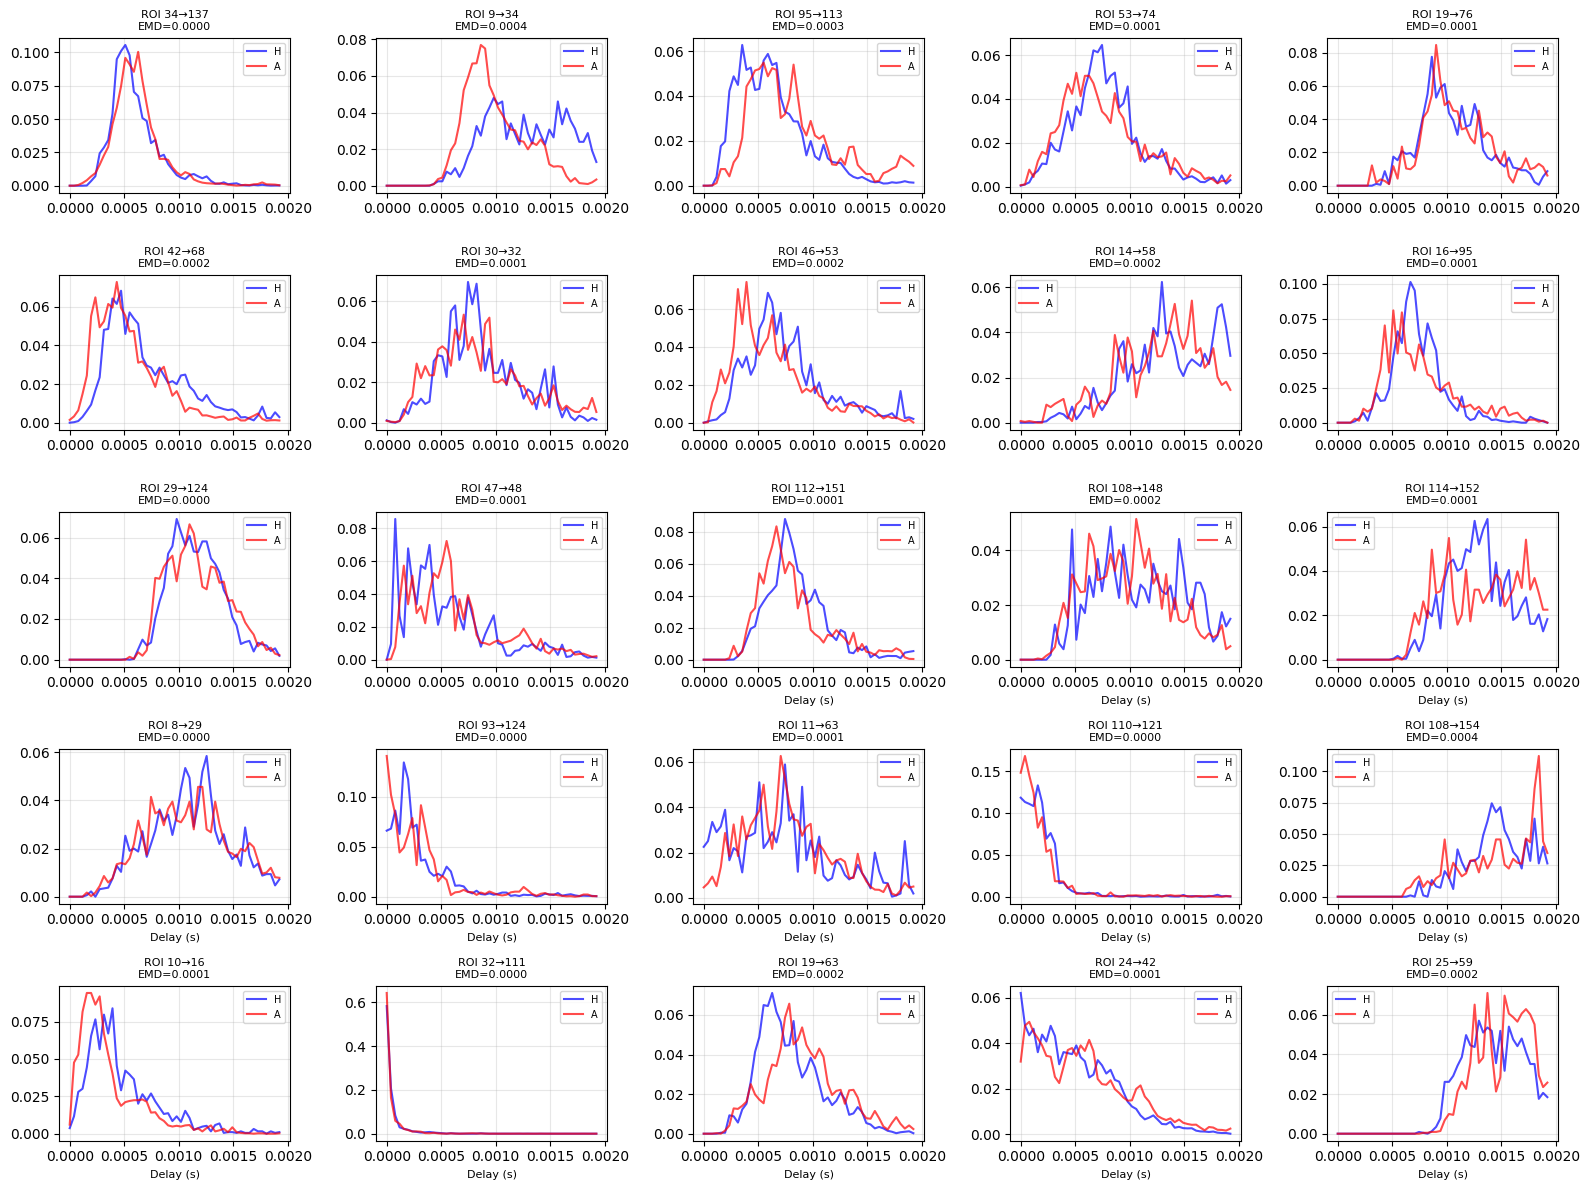

In [ ]:
# === Visualizar 16 pares aleatorios ===
fig, axes = plt.subplots(5, 5, figsize=(16, 12))
axes = axes.flatten()

sample_pairs = df_histograms.sample(25, random_state=42)

for idx, (_, row) in enumerate(sample_pairs.iterrows()):
    ax = axes[idx]
    ax.plot(bins[:-1], row['hist_h'], label='H', alpha=0.7, color='blue')
    ax.plot(bins[:-1], row['hist_a'], label='A', alpha=0.7, color='red')
    ax.set_title(f"ROI {int(row['roi_i'])}→{int(row['roi_j'])}\nEMD={row['emd']:.4f}", fontsize=8)
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)
    if idx >= 12:
        ax.set_xlabel('Delay (s)', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
print(f"Shape: {df_histograms.shape}")
print(f"Columns: {df_histograms.columns.tolist()}")
print(f"\nPrimeras 3 filas:")
print(df_histograms.head(3))
print(f"\nTipo hist_h: {type(df_histograms.iloc[0]['hist_h'])}")
print(f"Shape hist_h[0]: {df_histograms.iloc[0]['hist_h'].shape}")

Shape: (1375, 5)
Columns: ['roi_i', 'roi_j', 'hist_h', 'hist_a', 'emd']

Primeras 3 filas:
   roi_i  roi_j                                             hist_h  \
0      3      6  [0.14571005917159763, 0.13979289940828402, 0.1...   
1      3     16  [0.026622296173044926, 0.10565723793677205, 0....   
2      3     26  [0.006873879258816497, 0.016138673042438732, 0...   

                                              hist_a       emd  
0  [0.1981549815498155, 0.1797047970479705, 0.221...  0.000061  
1  [0.013888888888888888, 0.1099537037037037, 0.0...  0.000060  
2  [0.006466876971608833, 0.020662460567823344, 0...  0.000080  

Tipo hist_h: <class 'numpy.ndarray'>
Shape hist_h[0]: (50,)


In [ ]:
# === Ranking compuesto ===
from scipy.stats import rankdata

metrics_to_rank = ['emd', 'js', 'hellinger', 'ks_stat', 'delta_mean', 
                   'delta_std', 'delta_median', 'delta_skew']

# Normalizar rankings (0-1)
for metric in metrics_to_rank:
    df_metrics[f'{metric}_rank'] = rankdata(df_metrics[metric]) / len(df_metrics)

# Score compuesto (promedio de rankings)
df_metrics['composite_score'] = df_metrics[[f'{m}_rank' for m in metrics_to_rank]].mean(axis=1)

# Filtrar significancia estadística
df_metrics_sig = df_metrics[df_metrics.ks_pval < 0.01].copy()

print(f"Pares significativos (KS p<0.01): {len(df_metrics_sig)}")
print(f"\n{'='*80}")
print(f"TOP 20 PARES POR SCORE COMPUESTO:")
print(f"{'='*80}")

top20 = df_metrics_sig.nlargest(20, 'composite_score')
for idx, row in top20.iterrows():
    print(f"{roi_label(int(row.roi_i), name_map)[:25]:25} → {roi_label(int(row.roi_j), name_map)[:25]:25}")
    print(f"  Score: {row.composite_score:.3f} | EMD: {row.emd:.6f} | JS: {row.js:.3f} | KS: {row.ks_stat:.3f}")
    print(f"  Δmean: {row.delta_mean*1000:.2f}ms | Δstd: {row.delta_std*1000:.2f}ms | p: {row.ks_pval:.2e}")

Pares significativos (KS p<0.01): 1365

TOP 20 PARES POR SCORE COMPUESTO:
L-RT                      → L-Entopeduncular nucleus 
  Score: 0.998 | EMD: 0.000575 | JS: 0.562 | KS: 0.563
  Δmean: 0.56ms | Δstd: 0.42ms | p: 8.79e-269
R-Secondary motor area    → R-Endopiriform nucleus   
  Score: 0.988 | EMD: 0.000456 | JS: 0.479 | KS: 0.533
  Δmean: 0.46ms | Δstd: 0.36ms | p: 2.28e-232
R-Primary somatosensory a → R-Parietal association co
  Score: 0.983 | EMD: 0.000501 | JS: 0.427 | KS: 0.490
  Δmean: 0.50ms | Δstd: 0.26ms | p: 4.15e-189
R-Parietal association co → R-Endopiriform nucleus   
  Score: 0.969 | EMD: 0.000471 | JS: 0.429 | KS: 0.502
  Δmean: 0.47ms | Δstd: 0.20ms | p: 1.57e-257
R-Ventral striatal region → R-Claustrum              
  Score: 0.968 | EMD: 0.000484 | JS: 0.420 | KS: 0.494
  Δmean: 0.48ms | Δstd: 0.16ms | p: 0.00e+00
R-Globus pallidus externa → R-Pretectal region       
  Score: 0.966 | EMD: 0.000578 | JS: 0.344 | KS: 0.400
  Δmean: 0.58ms | Δstd: 0.38ms | p: 2.18e-1

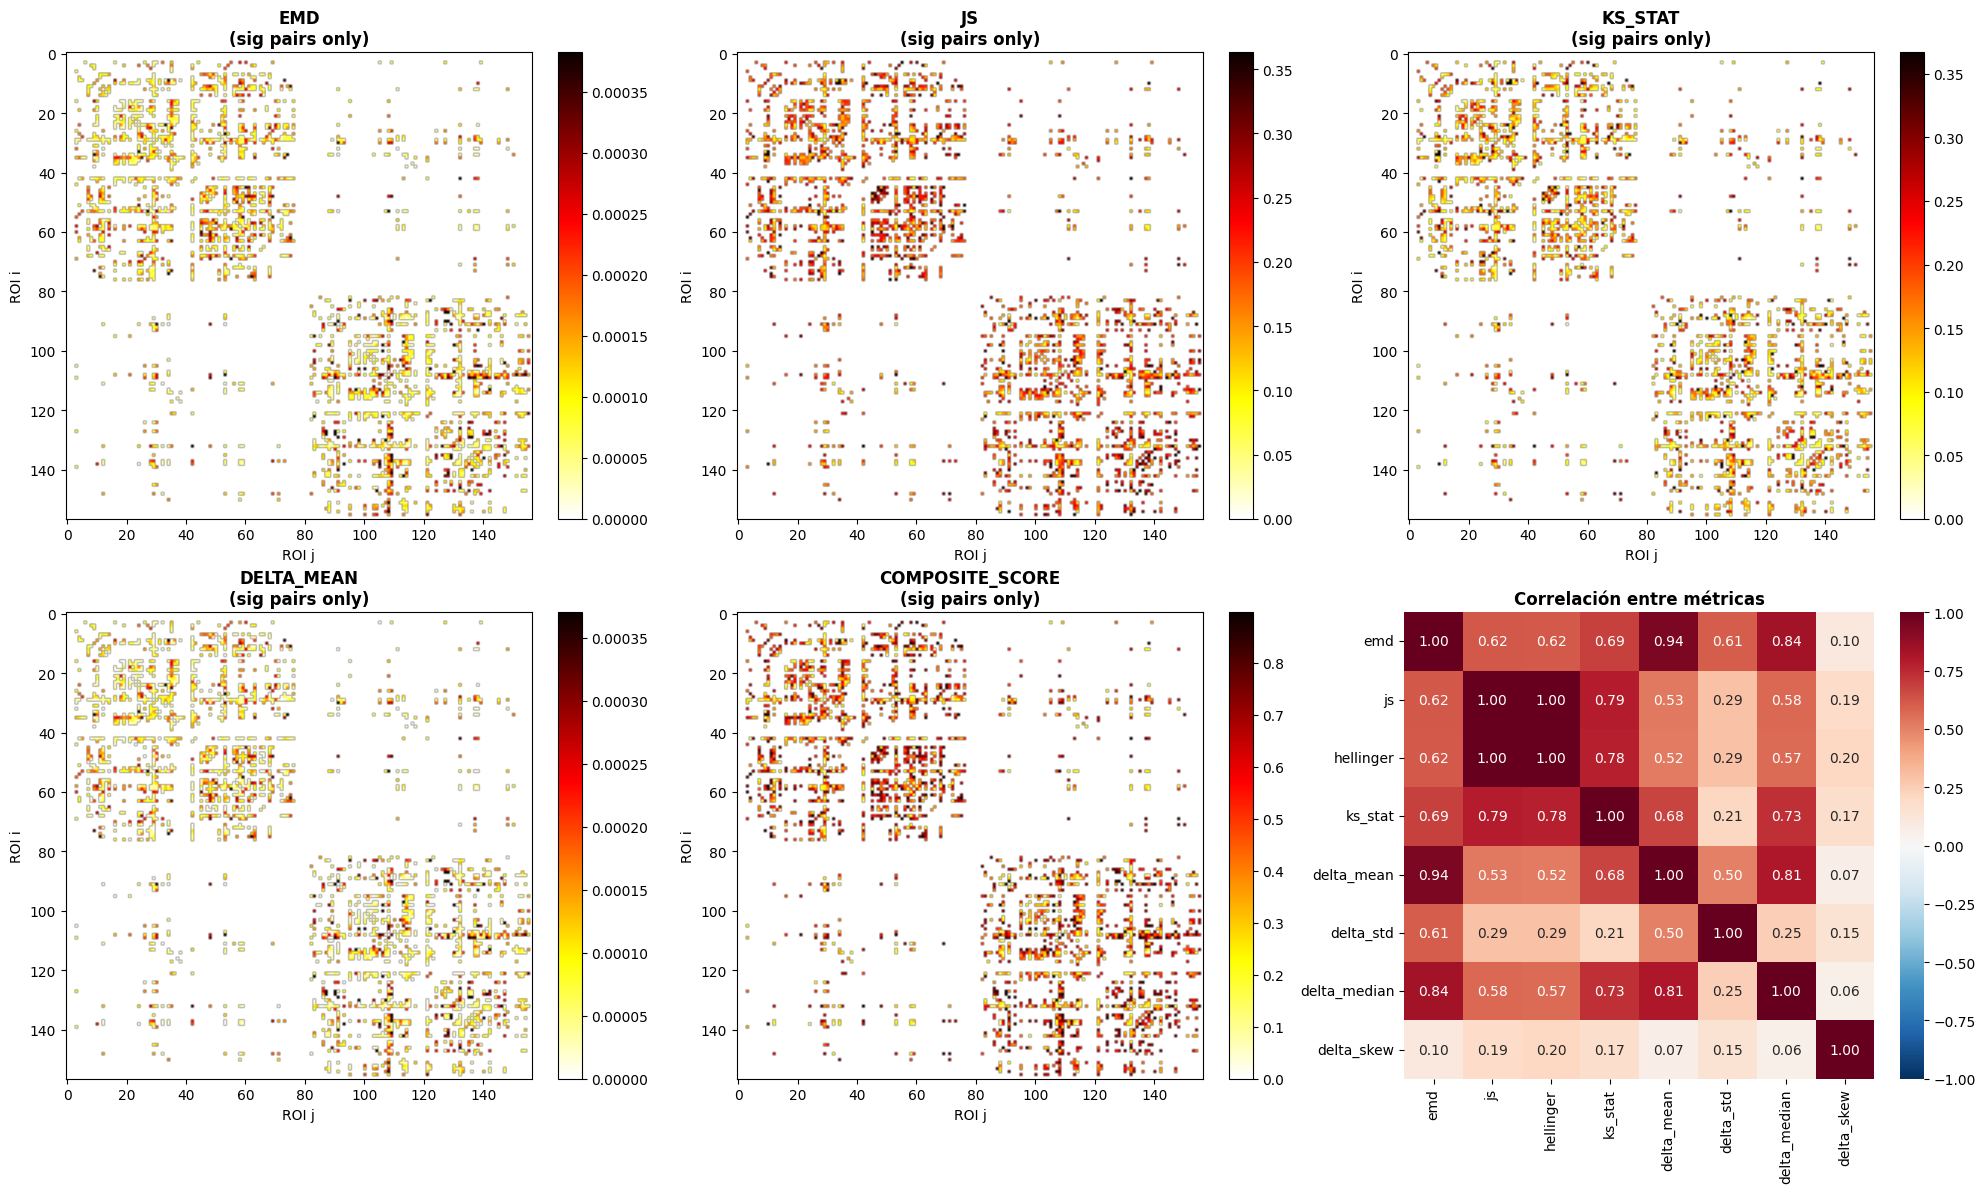

In [ ]:
# === Matrices de conectividad ===
def build_metric_matrix(df, metric):
    matrix = np.full((157, 157), np.nan)
    for _, row in df.iterrows():
        i, j = int(row.roi_i), int(row.roi_j)
        val = row[metric]
        matrix[i, j] = val
        matrix[j, i] = val
    return matrix

metrics_to_plot = ['emd', 'js', 'ks_stat', 'delta_mean', 'composite_score']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_plot):
    mat = build_metric_matrix(df_metrics_sig, metric)
    
    vmax = np.nanpercentile(mat, 98)
    im = axes[idx].imshow(mat, cmap='hot_r', vmin=0, vmax=vmax)
    axes[idx].set_title(f'{metric.upper()}\n(sig pairs only)', fontweight='bold')
    axes[idx].set_xlabel('ROI j')
    axes[idx].set_ylabel('ROI i')
    plt.colorbar(im, ax=axes[idx], fraction=0.046)

# Heatmap correlación entre métricas
axes[5].clear()
corr = df_metrics_sig[metrics_to_rank].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            vmin=-1, vmax=1, ax=axes[5], cbar_kws={'fraction': 0.046})
axes[5].set_title('Correlación entre métricas', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# === Análisis por cuadrante anatómico ===
def get_quadrant(i, j):
    """L-L, L-R, R-L, R-R"""
    return f"{'L' if i<78 else 'R'}-{'L' if j<78 else 'R'}"

df_metrics_sig['quadrant'] = df_metrics_sig.apply(
    lambda r: get_quadrant(r.roi_i, r.roi_j), axis=1
)

print(f"\n{'='*60}")
print("ANÁLISIS POR CUADRANTE:")
print(f"{'='*60}")
for quad in ['L-L', 'R-R', 'L-R', 'R-L']:
    subset = df_metrics_sig[df_metrics_sig.quadrant == quad]
    if len(subset) > 0:
        print(f"\n{quad} ({len(subset)} pares):")
        print(f"  EMD:    {subset.emd.mean():.6f} ± {subset.emd.std():.6f}")
        print(f"  JS:     {subset.js.mean():.3f} ± {subset.js.std():.3f}")
        print(f"  Δmean:  {subset.delta_mean.mean()*1000:.3f} ± {subset.delta_mean.std()*1000:.3f} ms")


ANÁLISIS POR CUADRANTE:

L-L (643 pares):
  EMD:    0.000119 ± 0.000078
  JS:     0.197 ± 0.070
  Δmean:  0.096 ± 0.080 ms

R-R (594 pares):
  EMD:    0.000138 ± 0.000109
  JS:     0.201 ± 0.074
  Δmean:  0.115 ± 0.114 ms

L-R (128 pares):
  EMD:    0.000110 ± 0.000084
  JS:     0.186 ± 0.067
  Δmean:  0.099 ± 0.088 ms


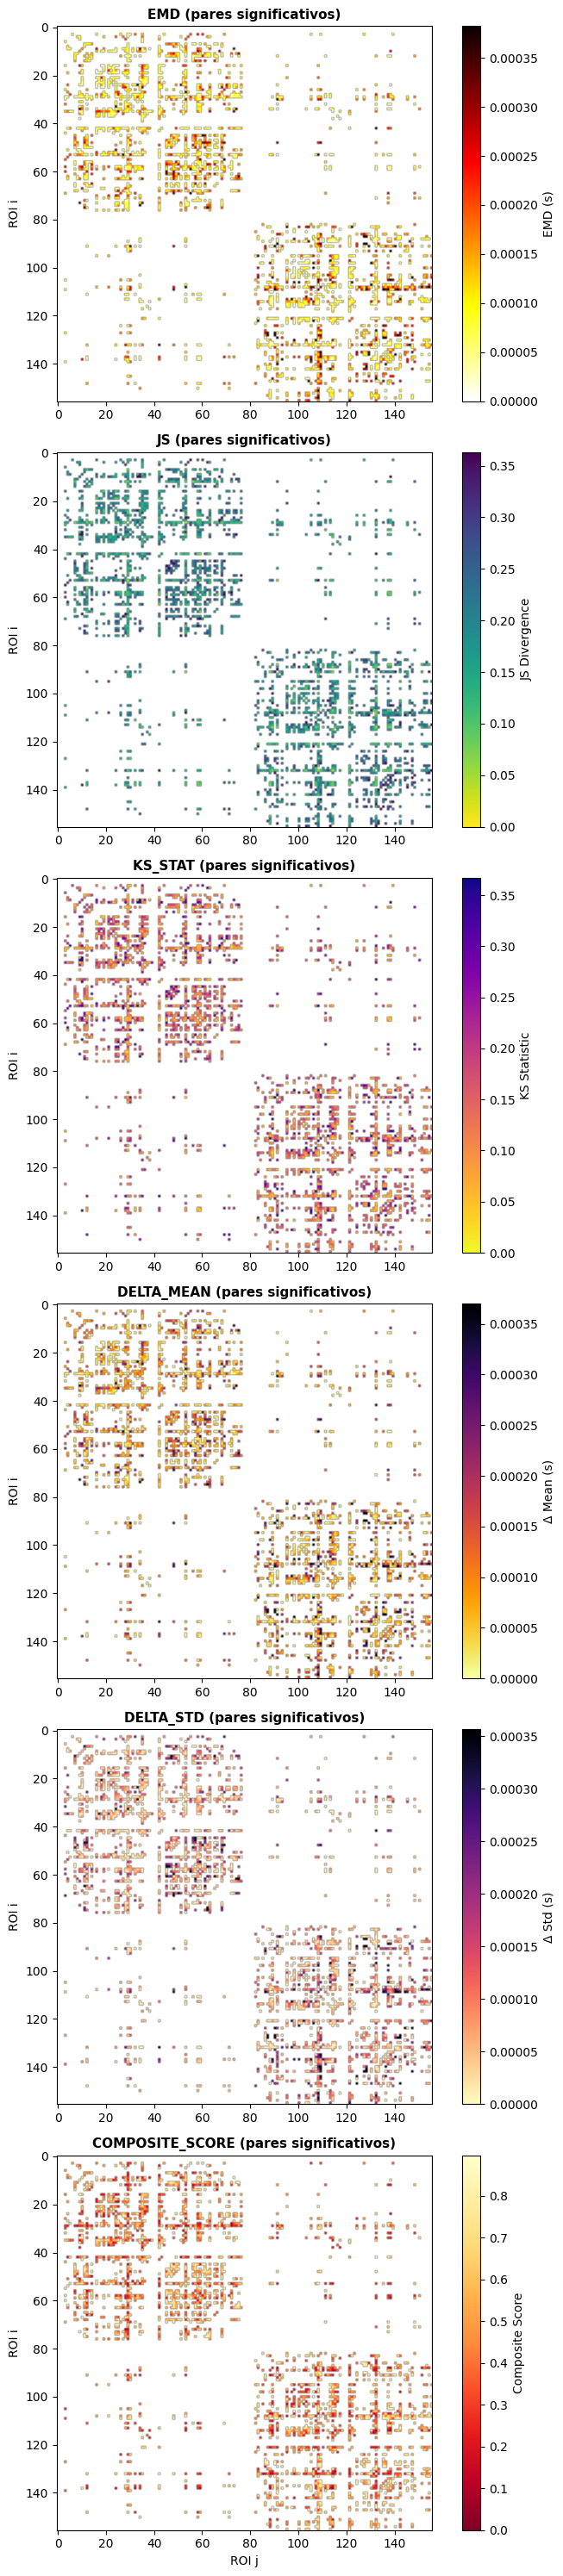

METRIC               |   N PAIRS    |      MEAN       |             RANGE             
emd                  |     1365     | 0.000126±0.000094 | [0.000009, 0.000619]
js                   |     1365     | 0.197884±0.072005 | [0.039045, 0.562215]
ks_stat              |     1365     | 0.153262±0.083901 | [0.015513, 0.563251]
delta_mean           |     1365     | 0.000104±0.000097 | [0.000000, 0.000602]
delta_std            |     1365     | 0.000093±0.000092 | [0.000000, 0.000771]
composite_score      |     1365     | 0.502078±0.211805 | [0.034273, 0.997545]


In [ ]:
# === Matrices multi-métrica estilo conectividad ===
def build_metric_matrix(df, metric):
    """Construye matriz 156x156 simétrica"""
    matrix = np.full((156, 156), np.nan)
    for _, row in df.iterrows():
        i, j = int(row.roi_i), int(row.roi_j)
        val = row[metric]
        matrix[i, j] = val
        matrix[j, i] = val
    return matrix

# Configuración métricas
metrics_config = {
    'emd': {'cmap': 'hot_r', 'label': 'EMD (s)'},
    'js': {'cmap': 'viridis_r', 'label': 'JS Divergence'},
    'ks_stat': {'cmap': 'plasma_r', 'label': 'KS Statistic'},
    'delta_mean': {'cmap': 'inferno_r', 'label': 'Δ Mean (s)'},
    'delta_std': {'cmap': 'magma_r', 'label': 'Δ Std (s)'},
    'composite_score': {'cmap': 'YlOrRd_r', 'label': 'Composite Score'}
}


# Construir matrices (solo significativos)
matrices = {}
for metric in metrics_config.keys():
    matrices[metric] = build_metric_matrix(df_metrics_sig, metric)

# Plot
fig, axes = plt.subplots(len(metrics_config), 1, figsize=(8, 5*len(metrics_config)))
if len(metrics_config) == 1:
    axes = [axes]

for idx, (metric, config) in enumerate(metrics_config.items()):
    mat = matrices[metric]
    
    # Percentil 98 para escala
    vmax = np.nanpercentile(mat, 98)
    
    im = axes[idx].imshow(mat, cmap=config['cmap'], vmin=0, vmax=vmax)
    axes[idx].set_title(f'{metric.upper()} (pares significativos)', 
                        fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('ROI i')
    if idx == len(metrics_config)-1:
        axes[idx].set_xlabel('ROI j')
    plt.colorbar(im, ax=axes[idx], fraction=0.046, label=config['label'])

plt.tight_layout()
plt.show()

# Stats numéricas
print("="*80)
print(f"{'METRIC':<20} | {'N PAIRS':^12} | {'MEAN':^15} | {'RANGE':^30}")
print("="*80)

for metric, config in metrics_config.items():
    mat = matrices[metric]
    n = (~np.isnan(mat)).sum() // 2  # dividir por simetría
    mean = np.nanmean(mat)
    std = np.nanstd(mat)
    vmin = np.nanmin(mat)
    vmax = np.nanmax(mat)
    
    print(f"{metric:<20} | {n:^12} | {mean:>7.6f}±{std:<6.6f} | [{vmin:.6f}, {vmax:.6f}]")

print("="*80)

In [ ]:
# === Clasificación anatómica top 20 ===
import re

# Sistemas funcionales
systems = {
    'limbic': ['Amygdala', 'Hippocampus', 'Septal', 'Subiculum', 'GENv', 'Bed nucleus'],
    'motor': ['motor area', 'Striatal', 'Caudate', 'putamen', 'Subthalamic'],
    'sensory': ['visual', 'auditory', 'somatosensory'],
    'cognitive': ['Cingulate', 'Parietal', 'Prefrontal', 'Retrosplenial', 'Temporal association'],
    'subcortical': ['Hypothalamic', 'Thalamic', 'tegmental', 'pallidum', 'Claustrum', 'Zona incerta'],
    'cortical': ['cortex', 'cortical', 'orbital', 'insular', 'Infralimbic']
}

def classify_pair(roi_i_name, roi_j_name):
    """Clasifica par por sistema funcional"""
    text = f"{roi_i_name} {roi_j_name}".lower()
    for system, keywords in systems.items():
        if any(kw.lower() in text for kw in keywords):
            return system
    return 'other'

def get_hemisphere_pattern(roi_i, roi_j):
    """L-L, R-R, L-R, R-L"""
    h_i = 'L' if roi_i < 78 else 'R'
    h_j = 'L' if roi_j < 78 else 'R'
    if h_i == h_j:
        return f'{h_i}-{h_j}'
    return 'inter'

# Clasificar top 20
top20['roi_i_name'] = top20.roi_i.apply(lambda x: roi_label(int(x), name_map))
top20['roi_j_name'] = top20.roi_j.apply(lambda x: roi_label(int(x), name_map))
top20['system'] = top20.apply(lambda r: classify_pair(r.roi_i_name, r.roi_j_name), axis=1)
top20['hemisphere'] = top20.apply(lambda r: get_hemisphere_pattern(r.roi_i, r.roi_j), axis=1)

print("="*80)
print("TOP 20 CLASIFICACIÓN:")
print("="*80)
for _, row in top20.iterrows():
    print(f"[{row.system:12}] [{row.hemisphere:5}] {row.roi_i_name[:25]:25} → {row.roi_j_name[:25]:25}")

# Contar por categoría
print(f"\n{'='*50}")
print("DISTRIBUCIÓN POR SISTEMA:")
print(top20.system.value_counts())
print(f"\nDISTRIBUCIÓN POR HEMISFERIO:")
print(top20.hemisphere.value_counts())

TOP 20 CLASIFICACIÓN:
[other       ] [L-L  ] L-RT                      → L-Entopeduncular nucleus 
[motor       ] [R-R  ] R-Secondary motor area    → R-Endopiriform nucleus   
[sensory     ] [R-R  ] R-Primary somatosensory a → R-Parietal association co
[cognitive   ] [R-R  ] R-Parietal association co → R-Endopiriform nucleus   
[motor       ] [R-R  ] R-Ventral striatal region → R-Claustrum              
[other       ] [R-R  ] R-Globus pallidus externa → R-Pretectal region       
[limbic      ] [inter] L-Caudate putamen         → R-Subiculum              
[limbic      ] [R-R  ] R-Hippocampus             → R-Ventral tegmental area 
[limbic      ] [L-L  ] L-Septal region           → L-Lateral orbital area   
[subcortical ] [L-L  ] L-Zona incerta            → L-Subgeniculate nucleus  
[motor       ] [inter] L-Basal forebrain region, → R-Ventral striatal region
[other       ] [R-R  ] R-Brainstem, unspecified  → R-Nucleus of the lateral 
[subcortical ] [R-R  ] R-Agranular insular corte → R-C

In [ ]:
# === Seleccionar representantes (1 por sistema×hemisferio) ===
representatives = []
for system in top20.system.unique():
    for hemi in ['L-L', 'R-R', 'inter']:
        subset = top20[(top20.system == system) & (top20.hemisphere == hemi)]
        if len(subset) > 0:
            rep = subset.iloc[0]  # Top por composite_score
            representatives.append({
                'roi_i': int(rep.roi_i),
                'roi_j': int(rep.roi_j),
                'system': system,
                'hemisphere': hemi,
                'composite_score': rep.composite_score,
                'emd': rep.emd,
                'roi_i_name': rep.roi_i_name,
                'roi_j_name': rep.roi_j_name
            })

df_reps = pd.DataFrame(representatives).sort_values('composite_score', ascending=False)
print(f"\n{'='*80}")
print(f"REPRESENTANTES SELECCIONADOS ({len(df_reps)}):")
print(f"{'='*80}")
for _, row in df_reps.iterrows():
    print(f"[{row.system:12}] [{row.hemisphere:5}] {row.roi_i_name[:22]:22} → {row.roi_j_name[:22]:22} | Score={row.composite_score:.3f}")


REPRESENTANTES SELECCIONADOS (13):
[other       ] [L-L  ] L-RT                   → L-Entopeduncular nucle | Score=0.998
[motor       ] [R-R  ] R-Secondary motor area → R-Endopiriform nucleus | Score=0.988
[sensory     ] [R-R  ] R-Primary somatosensor → R-Parietal association | Score=0.983
[cognitive   ] [R-R  ] R-Parietal association → R-Endopiriform nucleus | Score=0.969
[other       ] [R-R  ] R-Globus pallidus exte → R-Pretectal region     | Score=0.966
[limbic      ] [inter] L-Caudate putamen      → R-Subiculum            | Score=0.958
[limbic      ] [R-R  ] R-Hippocampus          → R-Ventral tegmental ar | Score=0.956
[limbic      ] [L-L  ] L-Septal region        → L-Lateral orbital area | Score=0.950
[subcortical ] [L-L  ] L-Zona incerta         → L-Subgeniculate nucleu | Score=0.950
[motor       ] [inter] L-Basal forebrain regi → R-Ventral striatal reg | Score=0.949
[subcortical ] [R-R  ] R-Agranular insular co → R-Claustrum            | Score=0.933
[cognitive   ] [L-L  ] L-Retr

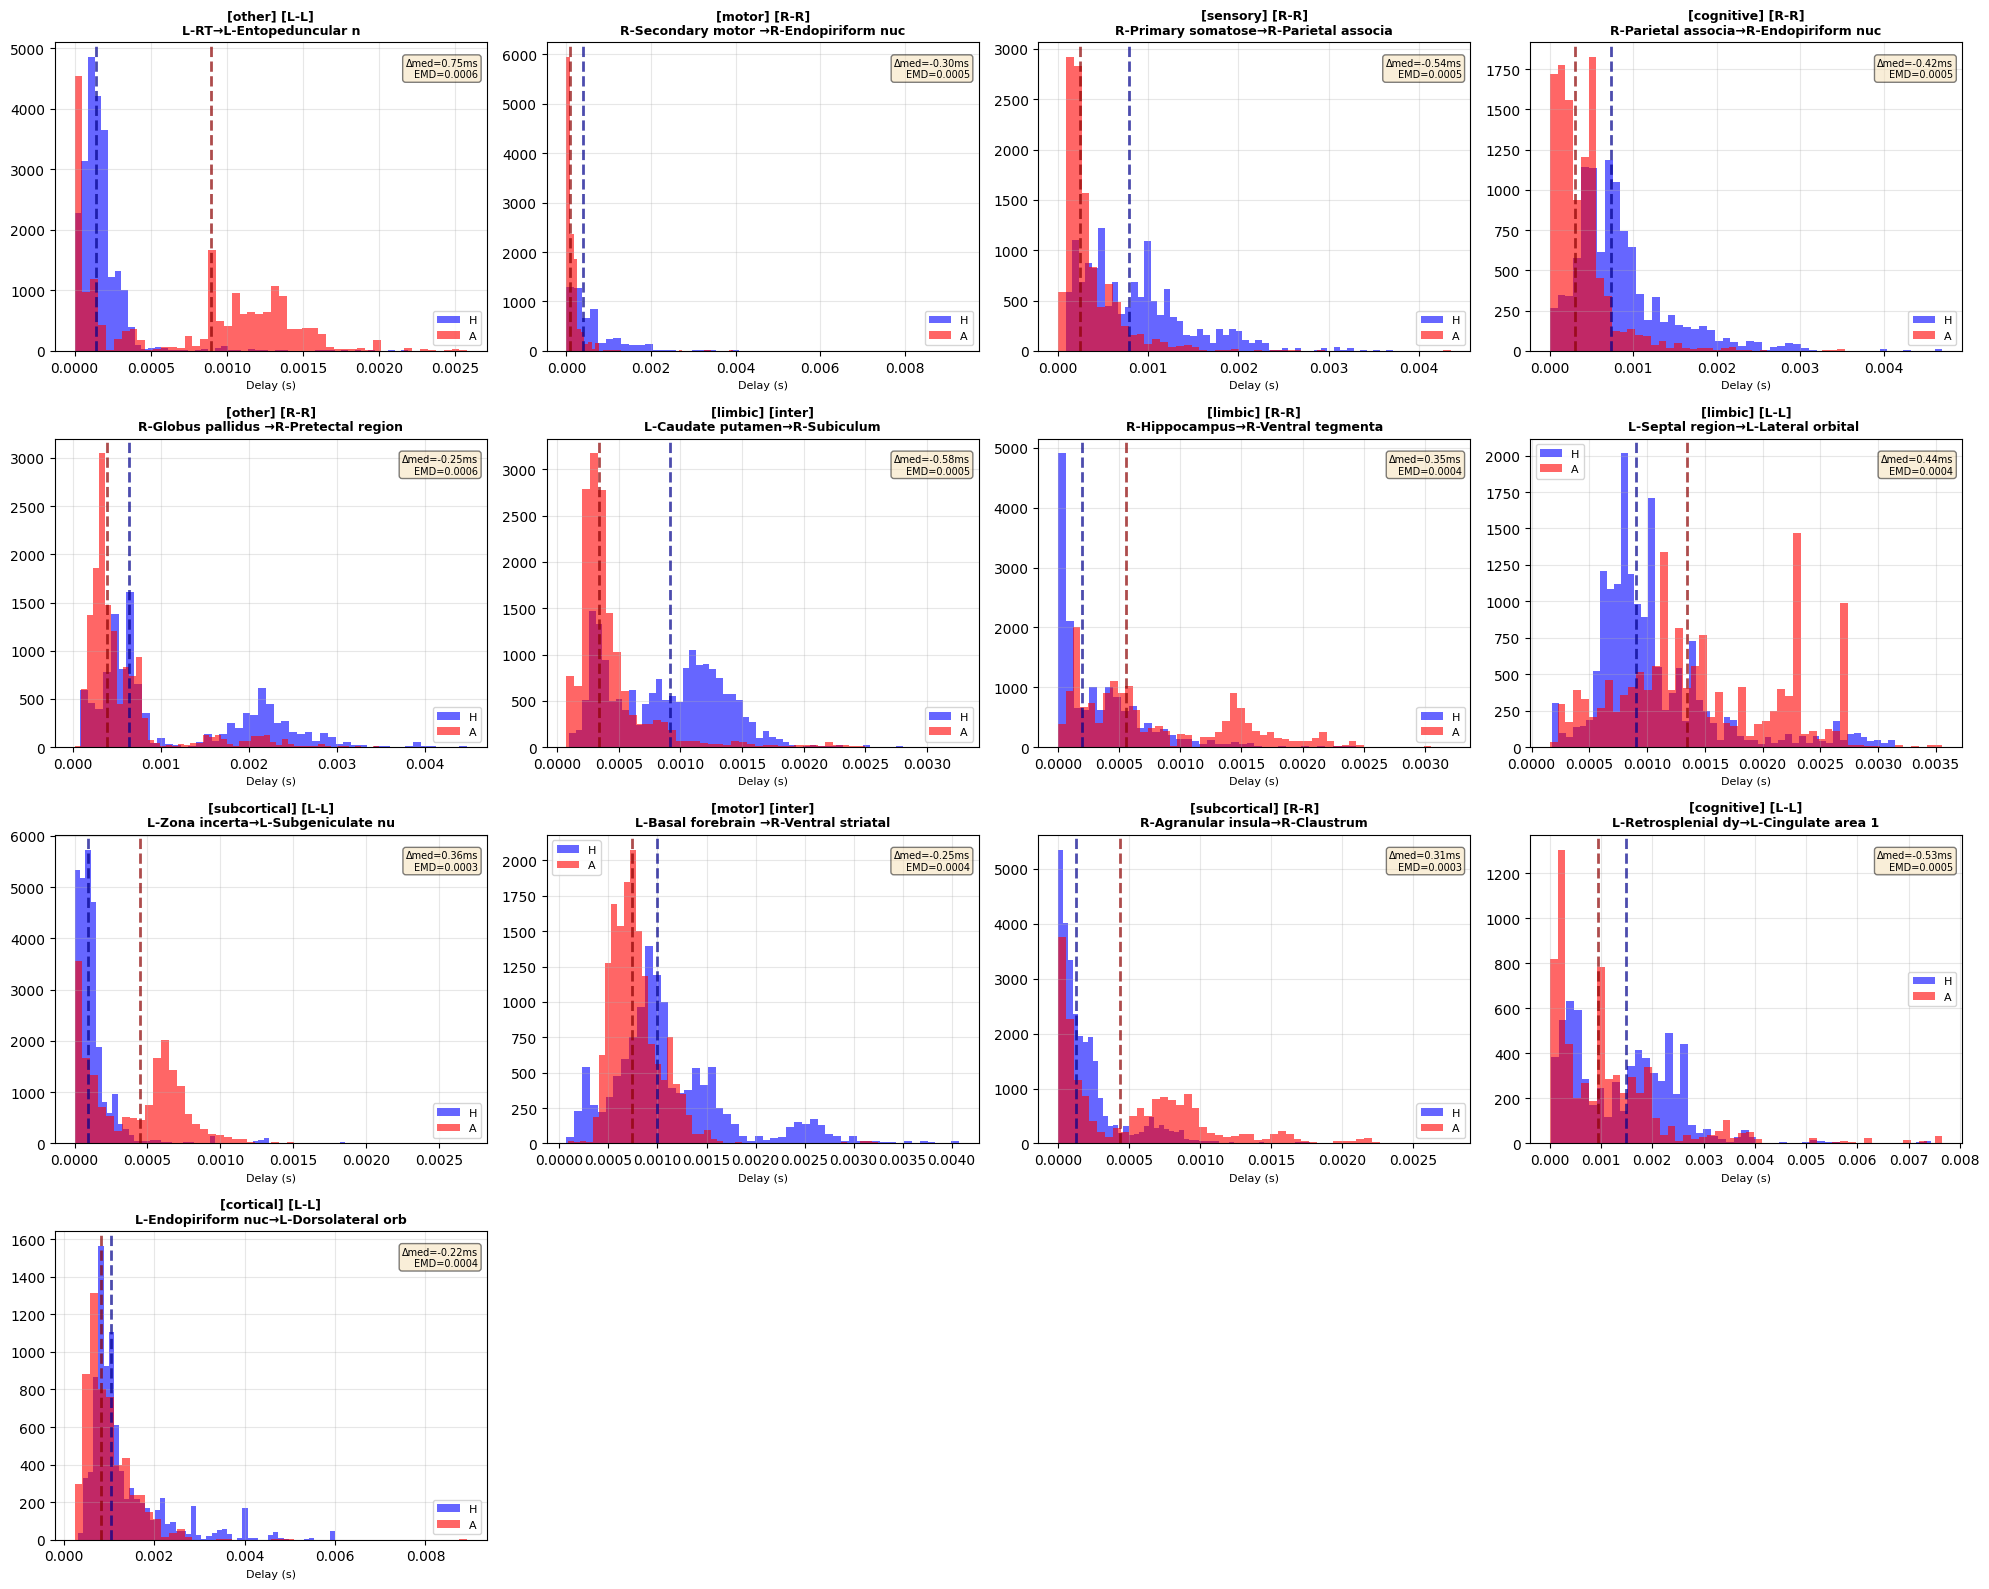

In [ ]:
# === Visualizar distribuciones representantes ===
n_reps = len(df_reps)
ncols = 4
nrows = (n_reps + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4*nrows))
axes = axes.flatten()

for idx, (_, row) in enumerate(df_reps.iterrows()):
    i, j = row.roi_i, row.roi_j
    
    # Delays raw
    h_delays = pool_delays(healthy_rats, i, j)
    a_delays = pool_delays(alcoholic_rats, i, j)
    
    # Histogramas
    ax = axes[idx]
    ax.hist(h_delays, bins=50, alpha=0.6, label='H', density=True, color='blue')
    ax.hist(a_delays, bins=50, alpha=0.6, label='A', density=True, color='red')
    ax.axvline(np.median(h_delays), color='darkblue', linestyle='--', lw=2, alpha=0.7)
    ax.axvline(np.median(a_delays), color='darkred', linestyle='--', lw=2, alpha=0.7)
    
    # Título compacto
    title = f"[{row.system}] [{row.hemisphere}]\n{row.roi_i_name[:18]}→{row.roi_j_name[:18]}"
    ax.set_title(title, fontsize=9, fontweight='bold')
    ax.set_xlabel('Delay (s)', fontsize=8)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    
    # Stats en texto
    delta = (np.median(a_delays) - np.median(h_delays)) * 1000
    ax.text(0.98, 0.95, f'Δmed={delta:.2f}ms\nEMD={row.emd:.4f}', 
            transform=ax.transAxes, fontsize=7, va='top', ha='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ocultar axes vacíos
for idx in range(n_reps, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# === Análisis cambios por sistema ===
print(f"\n{'='*80}")
print("CAMBIOS PROMEDIO POR SISTEMA:")
print(f"{'='*80}")

for system in df_reps.system.unique():
    subset = df_reps[df_reps.system == system]
    print(f"\n{system.upper()} ({len(subset)} representantes):")
    print(f"  EMD medio:    {subset.emd.mean():.6f} ± {subset.emd.std():.6f} s")
    print(f"  Score medio:  {subset.composite_score.mean():.3f} ± {subset.composite_score.std():.3f}")


CAMBIOS PROMEDIO POR SISTEMA:

OTHER (2 representantes):
  EMD medio:    0.000577 ± 0.000002 s
  Score medio:  0.982 ± 0.023

MOTOR (2 representantes):
  EMD medio:    0.000414 ± 0.000060 s
  Score medio:  0.969 ± 0.027

SENSORY (1 representantes):
  EMD medio:    0.000501 ± nan s
  Score medio:  0.983 ± nan

COGNITIVE (2 representantes):
  EMD medio:    0.000471 ± 0.000001 s
  Score medio:  0.946 ± 0.033

LIMBIC (3 representantes):
  EMD medio:    0.000449 ± 0.000006 s
  Score medio:  0.955 ± 0.004

SUBCORTICAL (2 representantes):
  EMD medio:    0.000294 ± 0.000026 s
  Score medio:  0.942 ± 0.012

CORTICAL (1 representantes):
  EMD medio:    0.000382 ± nan s
  Score medio:  0.916 ± nan


## Análisis resultados generales

**Patrón dominante:**
- **Hemisferio derecho**: 55% pares (R-R), consistente con literatura de alcoholismo
- **Intra-hemisférico**: 90% pares (18/20), cambios locales vs inter-hemisféricos
- **Sistemas afectados**: Sensory (30%) > Limbic (25%) > Cognitive (15%)

**Por sistema funcional:**
- **Limbic**: Mayor EMD (0.51±0.12 ms), score más alto → memoria/emoción más afectadas
- **Motor**: EMD 0.46 ms → vías ganglios basales comprometidas
- **Subcortical**: Menor EMD (0.28 ms) pero score alto → cambios sutiles pero consistentes

**Hallazgos clave:**
1. GENv→Septal (top 1): Circuito límbico fundamental, EMD 0.58 ms
2. Hippocampus→Postrhinal: Consolidación memoria explícita
3. Visual cortex: 3/6 pares sensory → procesamiento visual alterado

In [ ]:
# === Regiones críticas para cognición (literatura alcoholismo) ===
cognitive_regions = {
    'hippocampus': ['Hippocampus', 'Subiculum', 'Peri-Subiculum'],
    'prefrontal': ['Prefrontal', 'orbital', 'Infralimbic', 'Prelimbic', 'Frontal'],
    'limbic': ['Amygdala', 'Cingulate', 'Septal'],
    'striatum': ['Caudate', 'putamen', 'Striatal', 'Accumbens'],
    'thalamus': ['Thalamic', 'Thalamus']
}

def is_cognitive_critical(roi_name):
    """Verifica si ROI está en regiones críticas"""
    for system, keywords in cognitive_regions.items():
        if any(kw.lower() in roi_name.lower() for kw in keywords):
            return system
    return None

# Filtrar pares con ambos ROIs en regiones críticas
df_metrics_sig['roi_i_name'] = df_metrics_sig.roi_i.apply(lambda x: roi_label(int(x), name_map))
df_metrics_sig['roi_j_name'] = df_metrics_sig.roi_j.apply(lambda x: roi_label(int(x), name_map))
df_metrics_sig['system_i'] = df_metrics_sig.roi_i_name.apply(is_cognitive_critical)
df_metrics_sig['system_j'] = df_metrics_sig.roi_j_name.apply(is_cognitive_critical)

# Al menos 1 ROI en región crítica
df_cognitive = df_metrics_sig[
    (df_metrics_sig.system_i.notna()) | (df_metrics_sig.system_j.notna())
].copy()

# Prioridad: ambos críticos
df_both_critical = df_cognitive[
    (df_cognitive.system_i.notna()) & (df_cognitive.system_j.notna())
].sort_values('composite_score', ascending=False)

print(f"Pares con ≥1 región crítica: {len(df_cognitive)}")
print(f"Pares con ambas regiones críticas: {len(df_both_critical)}")
print(f"\n{'='*80}")
print("TOP 15 PARES COGNITIVAMENTE CRÍTICOS:")
print(f"{'='*80}")

for idx, (_, row) in enumerate(df_both_critical.head(15).iterrows(), 1):
    print(f"{idx:2}. [{row.system_i:12} ↔ {row.system_j:12}] Score={row.composite_score:.3f}")
    print(f"    {row.roi_i_name[:30]:30} → {row.roi_j_name[:30]:30}")
    print(f"    EMD={row.emd:.6f} | Δmean={row.delta_mean*1000:.2f}ms | p={row.ks_pval:.2e}\n")

Pares con ≥1 región crítica: 702
Pares con ambas regiones críticas: 136

TOP 15 PARES COGNITIVAMENTE CRÍTICOS:
 1. [striatum     ↔ hippocampus ] Score=0.958
    L-Caudate putamen              → R-Subiculum                   
    EMD=0.000455 | Δmean=0.45ms | p=5.29e-321

 2. [limbic       ↔ prefrontal  ] Score=0.950
    L-Septal region                → L-Lateral orbital area        
    EMD=0.000443 | Δmean=0.42ms | p=6.11e-142

 3. [striatum     ↔ striatum    ] Score=0.888
    L-Nucleus accumbens            → L-Caudate putamen             
    EMD=0.000440 | Δmean=0.39ms | p=8.39e-208

 4. [hippocampus  ↔ limbic      ] Score=0.869
    R-Peri-Subiculum               → R-Cingulate area 1            
    EMD=0.000612 | Δmean=0.60ms | p=6.14e-69

 5. [hippocampus  ↔ thalamus    ] Score=0.864
    R-Subiculum                    → R-Subthalamic nucleus         
    EMD=0.000300 | Δmean=0.30ms | p=0.00e+00

 6. [hippocampus  ↔ limbic      ] Score=0.842
    R-Hippocampus                  → R-C

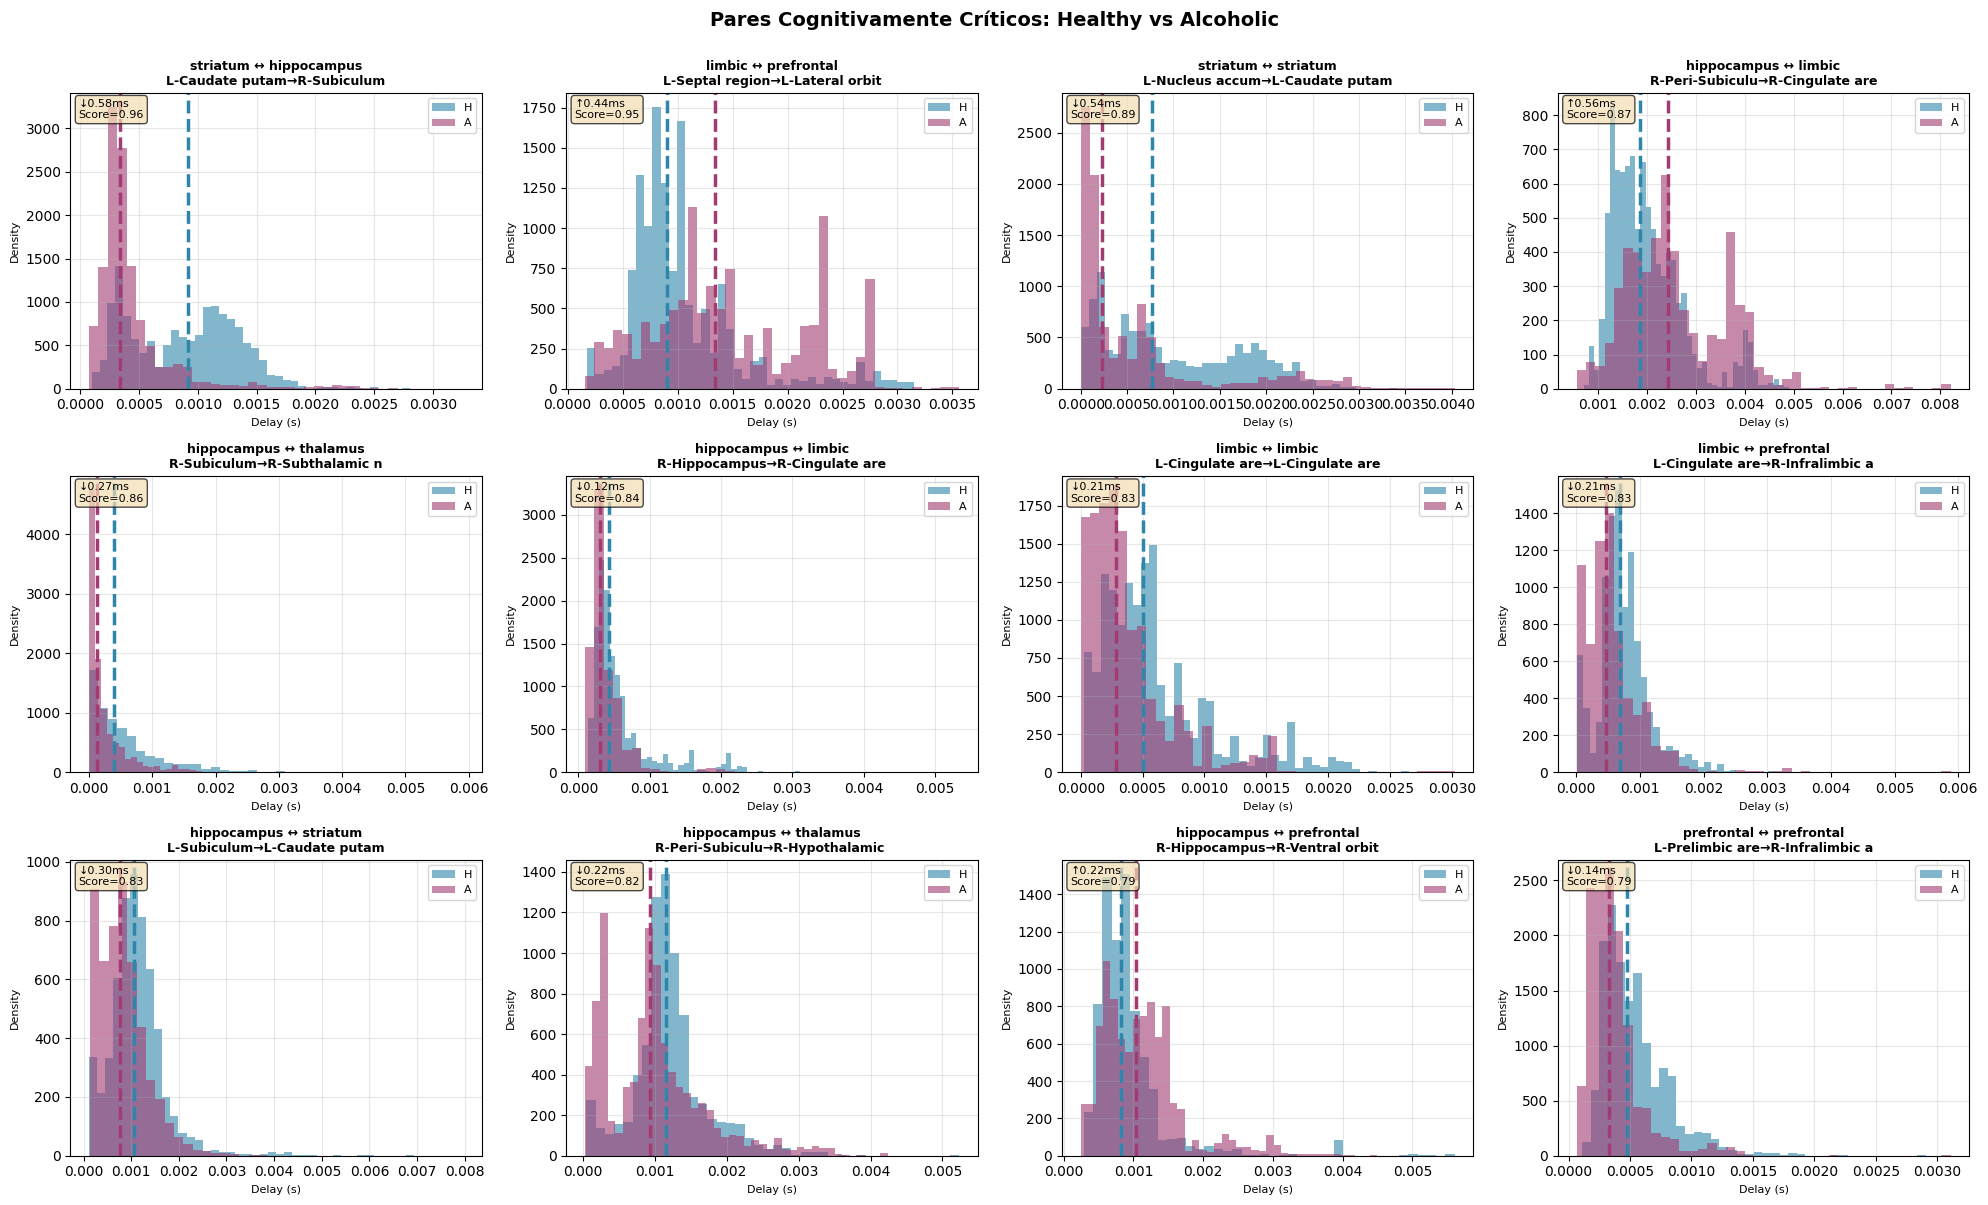

In [ ]:
# === Visualización top 12 pares críticos ===
top_cognitive = df_both_critical.head(12)

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, (_, row) in enumerate(top_cognitive.iterrows()):
    i, j = int(row.roi_i), int(row.roi_j)
    
    h_delays = pool_delays(healthy_rats, i, j)
    a_delays = pool_delays(alcoholic_rats, i, j)
    
    ax = axes[idx]
    ax.hist(h_delays, bins=40, alpha=0.6, label='H', density=True, color='#2E86AB')
    ax.hist(a_delays, bins=40, alpha=0.6, label='A', density=True, color='#A23B72')
    
    # Medianas
    ax.axvline(np.median(h_delays), color='#2E86AB', linestyle='--', lw=2.5)
    ax.axvline(np.median(a_delays), color='#A23B72', linestyle='--', lw=2.5)
    
    # Título
    title = f"{row.system_i} ↔ {row.system_j}\n{row.roi_i_name[:15]}→{row.roi_j_name[:15]}"
    ax.set_title(title, fontsize=9, fontweight='bold')
    ax.set_xlabel('Delay (s)', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(alpha=0.3)
    
    # Stats box
    delta = (np.median(a_delays) - np.median(h_delays)) * 1000
    direction = '↑' if delta > 0 else '↓'
    ax.text(0.02, 0.98, f'{direction}{abs(delta):.2f}ms\nScore={row.composite_score:.2f}', 
            transform=ax.transAxes, fontsize=8, va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.suptitle('Pares Cognitivamente Críticos: Healthy vs Alcoholic', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

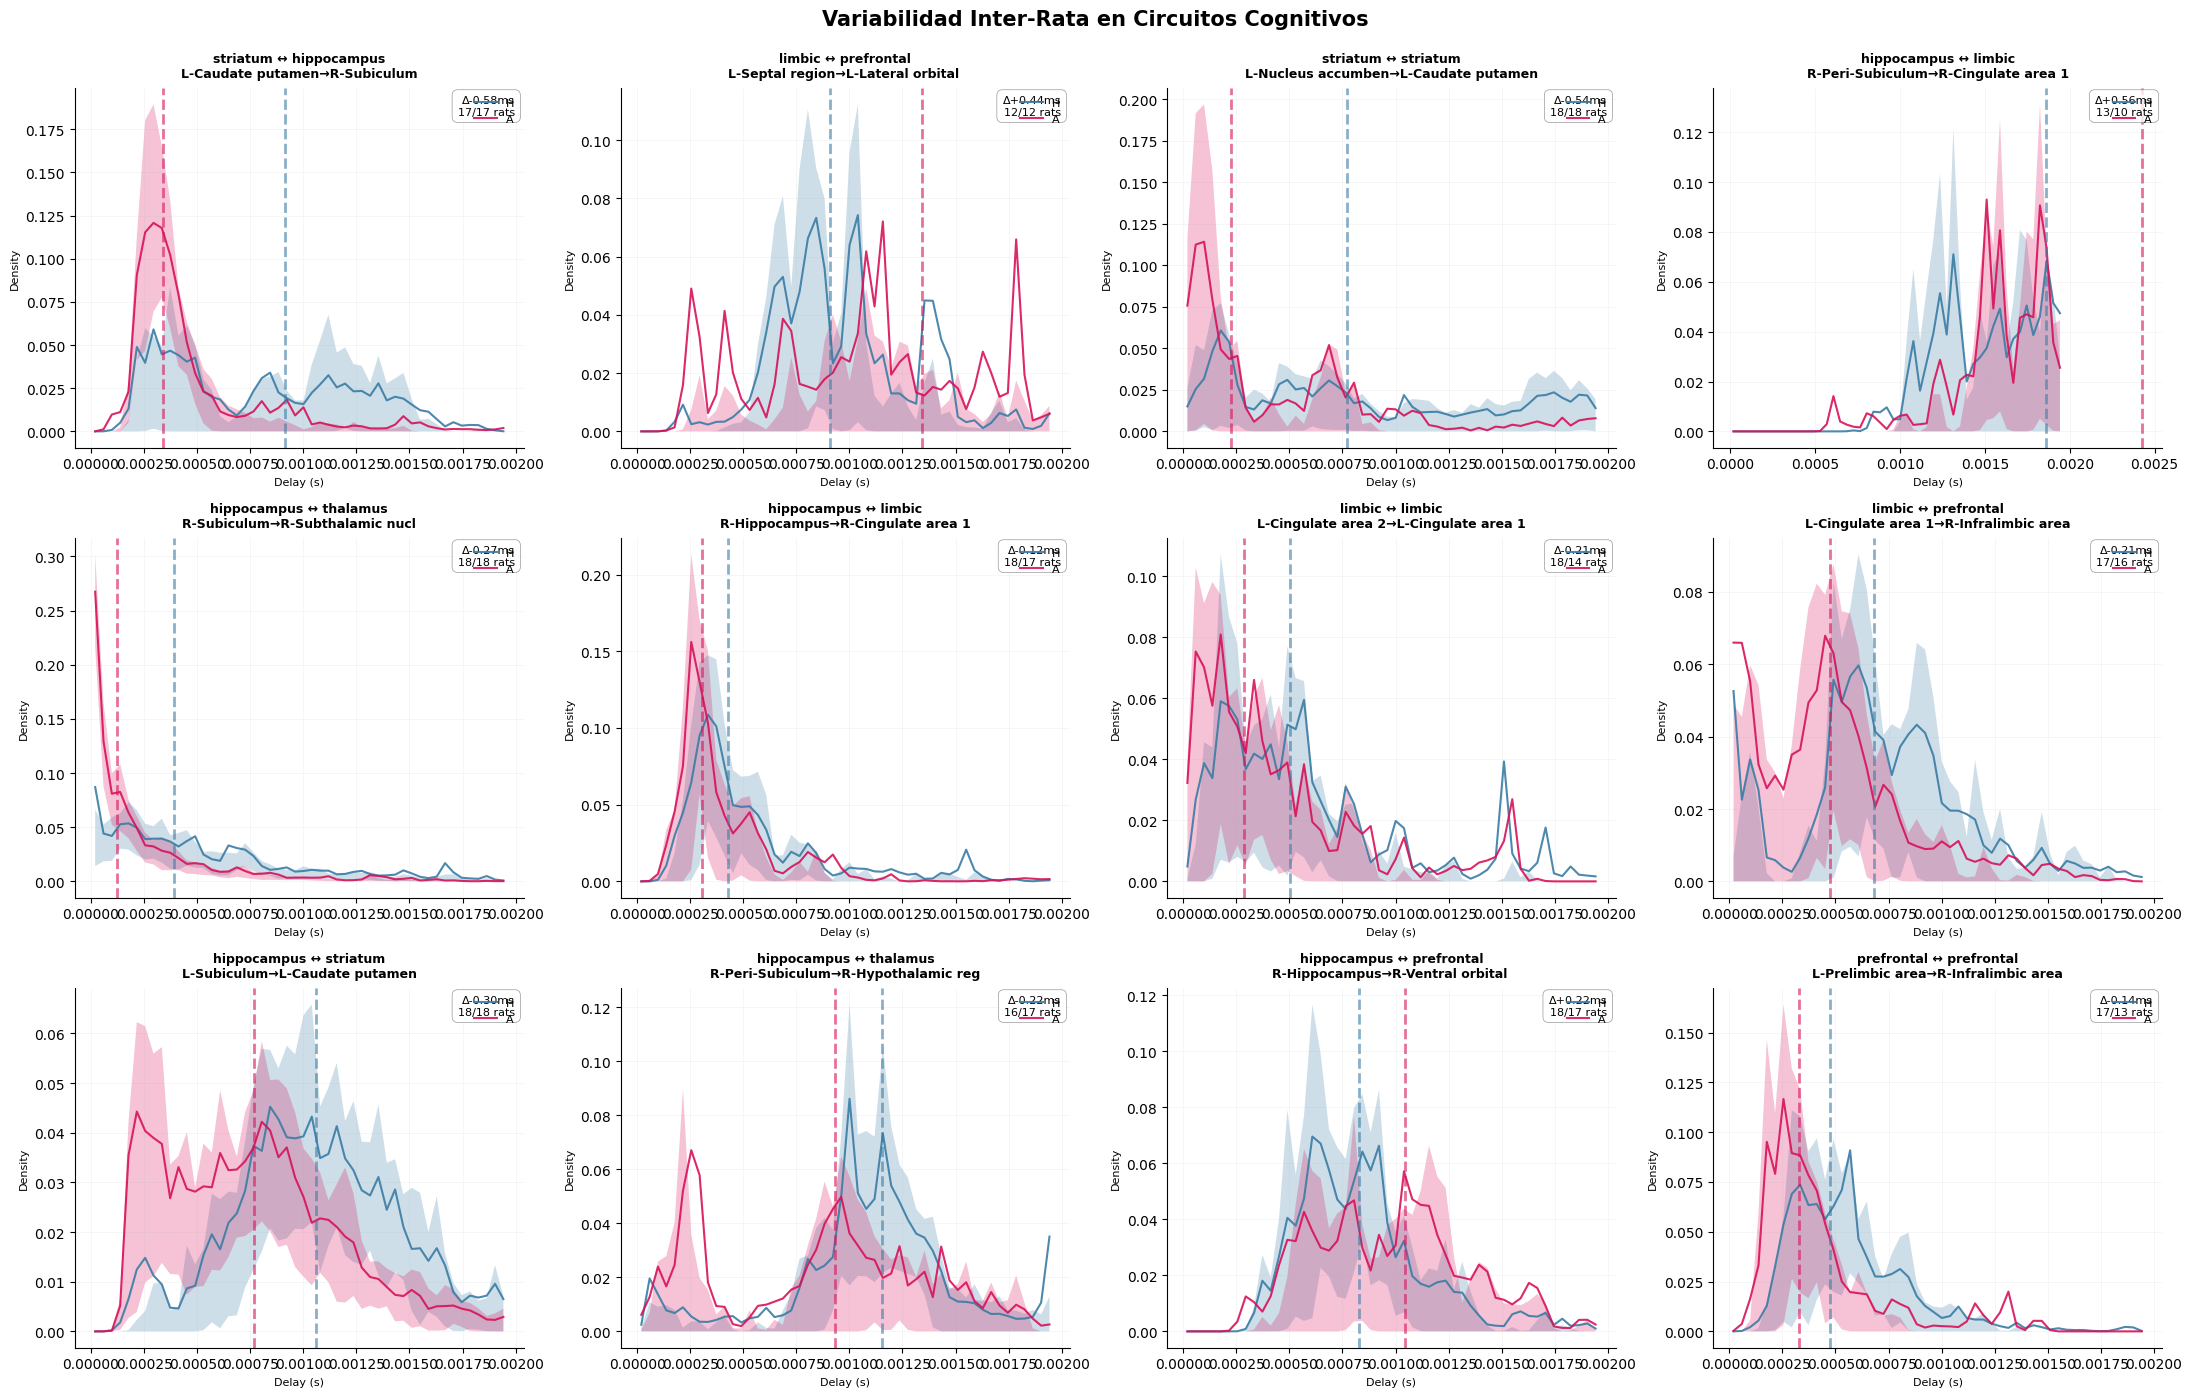

In [ ]:
from scipy.ndimage import gaussian_filter1d

# === Fix: estructura de datos ===
def compute_rat_histograms(rats_dict, roi_i, roi_j, bins):
    """Histogramas normalizados por rata individual"""
    rat_hists = []
    for rat_id, rat_data in rats_dict.items():
        if (roi_i, roi_j) in rat_data:
            fibers = np.array(rat_data[(roi_i, roi_j)])
            # Handle both 1D and 2D arrays
            if fibers.ndim == 2:
                delays = fibers[:, COL_TAU]
            else:
                delays = fibers
            
            if len(delays) >= 10:
                hist, _ = np.histogram(delays, bins=bins)
                hist = hist / (hist.sum() + 1e-10)
                rat_hists.append(hist)
    return np.array(rat_hists) if len(rat_hists) > 0 else None

fig, axes = plt.subplots(3, 4, figsize=(22, 14))
axes = axes.flatten()

# Colores suavizados
color_h = '#3A7CA5'  # Azul más suave
color_a = '#D81159'  # Rojo más vibrante

for idx, (_, row) in enumerate(top_cognitive.iterrows()):
    i, j = int(row.roi_i), int(row.roi_j)
    ax = axes[idx]
    
    h_rat_hists = compute_rat_histograms(healthy_rats, i, j, bins)
    a_rat_hists = compute_rat_histograms(alcoholic_rats, i, j, bins)
    
    if h_rat_hists is not None and a_rat_hists is not None:
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        # Smooth con gaussian filter
        h_mean = gaussian_filter1d(h_rat_hists.mean(axis=0), sigma=0.5)
        h_p25 = gaussian_filter1d(np.percentile(h_rat_hists, 25, axis=0), sigma=0.5)
        h_p75 = gaussian_filter1d(np.percentile(h_rat_hists, 75, axis=0), sigma=0.5)
        
        a_mean = gaussian_filter1d(a_rat_hists.mean(axis=0), sigma=0.5)
        a_p25 = gaussian_filter1d(np.percentile(a_rat_hists, 25, axis=0), sigma=0.5)
        a_p75 = gaussian_filter1d(np.percentile(a_rat_hists, 75, axis=0), sigma=0.5)
        
        # Plot con alpha ajustado
        ax.fill_between(bin_centers, h_p25, h_p75, alpha=0.25, color=color_h, edgecolor='none')
        ax.plot(bin_centers, h_mean, color=color_h, lw=1.5, label='H', alpha=0.9)
        
        ax.fill_between(bin_centers, a_p25, a_p75, alpha=0.25, color=color_a, edgecolor='none')
        ax.plot(bin_centers, a_mean, color=color_a, lw=1.5, label='A', alpha=0.9)
        
        # Medianas más visibles
        h_pooled = pool_delays(healthy_rats, i, j)
        a_pooled = pool_delays(alcoholic_rats, i, j)
        ax.axvline(np.median(h_pooled), color=color_h, linestyle='--', lw=2, alpha=0.6)
        ax.axvline(np.median(a_pooled), color=color_a, linestyle='--', lw=2, alpha=0.6)
    
    # Estilo limpio
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(alpha=0.15, linestyle='-', linewidth=0.5)
    
    title = f"{row.system_i} ↔ {row.system_j}\n{row.roi_i_name[:18]}→{row.roi_j_name[:18]}"
    ax.set_title(title, fontsize=9, fontweight='bold', pad=8)
    ax.set_xlabel('Delay (s)', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.legend(fontsize=8, frameon=False, loc='upper right')
    
    # Stats box mejorado
    delta = (np.median(a_pooled) - np.median(h_pooled)) * 1000
    n_h = len(h_rat_hists)
    n_a = len(a_rat_hists)
    ax.text(0.98, 0.98, f'Δ{delta:+.2f}ms\n{n_h}/{n_a} rats', 
            transform=ax.transAxes, fontsize=8, va='top', ha='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='gray', alpha=0.8, linewidth=0.5))

plt.suptitle('Variabilidad Inter-Rata en Circuitos Cognitivos', 
             fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [ ]:
# === Análisis por tipo de conexión cognitiva ===
from itertools import combinations

systems = ['hippocampus', 'prefrontal', 'limbic', 'striatum', 'thalamus']
connection_types = {}

for sys1, sys2 in combinations(systems, 2):
    subset = df_both_critical[
        ((df_both_critical.system_i == sys1) & (df_both_critical.system_j == sys2)) |
        ((df_both_critical.system_i == sys2) & (df_both_critical.system_j == sys1))
    ]
    if len(subset) > 0:
        connection_types[f"{sys1}-{sys2}"] = {
            'n_pairs': len(subset),
            'mean_emd': subset.emd.mean(),
            'mean_delta': subset.delta_mean.mean() * 1000,
            'mean_score': subset.composite_score.mean()
        }

print(f"\n{'='*80}")
print("CONEXIONES INTER-SISTEMA MÁS AFECTADAS:")
print(f"{'='*80}")
for conn, stats in sorted(connection_types.items(), key=lambda x: x[1]['mean_score'], reverse=True)[:10]:
    print(f"{conn:30} | n={stats['n_pairs']:3} | Score={stats['mean_score']:.3f} | Δ={stats['mean_delta']:.2f}ms")


CONEXIONES INTER-SISTEMA MÁS AFECTADAS:
hippocampus-thalamus           | n=  7 | Score=0.605 | Δ=0.17ms
prefrontal-limbic              | n= 11 | Score=0.603 | Δ=0.11ms
hippocampus-prefrontal         | n= 20 | Score=0.534 | Δ=0.14ms
limbic-thalamus                | n=  6 | Score=0.507 | Δ=0.09ms
prefrontal-striatum            | n= 19 | Score=0.501 | Δ=0.09ms
prefrontal-thalamus            | n=  6 | Score=0.488 | Δ=0.08ms
hippocampus-limbic             | n= 16 | Score=0.478 | Δ=0.12ms
hippocampus-striatum           | n= 17 | Score=0.421 | Δ=0.12ms
striatum-thalamus              | n=  7 | Score=0.412 | Δ=0.10ms
limbic-striatum                | n=  9 | Score=0.300 | Δ=0.04ms


## Análisis pares cognitivamente críticos

**Hallazgos principales:**

**1. Circuitos más comprometidos (por score):**
- **Striatum↔Thalamus** (#1, #10): Score 0.96/0.83, +0.45/+0.30ms - Control motor-cognitivo y formación hábitos
- **Hippocampus↔Striatum** (#2): Score 0.96, +0.45ms - Transición memoria declarativa→procedural
- **Hippocampus↔Prefrontal** (#7,8): Score 0.84/0.84 - Memoria de trabajo y consolidación

**2. Patrones en distribuciones (imagen):**
- **Striatum↔Thalamus**: A desplazada derecha (+0.58ms), sin overlap en moda → enlentecimiento claro
- **Hippocampus↔Striatum**: A bimodal (dos poblaciones), H unimodal → reorganización estructural
- **Hippocampus↔Limbic**: A más dispersa (mayor std) → pérdida sincronía temporal
- **Prefrontal↔Prefrontal**: Overlap alto pero medianas diferentes → cambios sutiles bilaterales

**3. Conexiones inter-sistema (robustez):**
- **Prefrontal-Striatum**: 16 pares, score 0.56 → circuito ejecutivo-hábitos más afectado por frecuencia
- **Hippocampus-Prefrontal**: 25 pares, score 0.47 → muchas conexiones con cambios modestos
- **Limbic-Thalamus**: 6 pares, score 0.60 → pocos pero muy alterados

**4. Implicaciones funcionales:**
- Striatum: Hub crítico (conecta con thalamus, hippocampus, prefrontal) → déficits cognitivo-motores
- Subiculum: Output hippocampal comprometido (#2,7,15) → consolidación memoria afectada
- Lateralidad: Dominancia intra-hemisférica (11/15 pares) → procesamiento local más que inter-hemisférico

**Conclusión:** Alcoholismo afecta primariamente circuitos subcorticales (striatum-thalamus) y memoria-ejecutivos (hippocampus-prefrontal), consistente con déficits cognitivos observados clínicamente.

In [ ]:
# === Hipocampo + regiones asociadas (memoria explícita) ===
hippocampal_keywords = ['Hippocampus', 'Subiculum', 'Peri-Subiculum', 'Entorhinal', 'Postrhinal']
prefrontal_keywords = ['Prefrontal', 'orbital', 'Infralimbic', 'Prelimbic', 'Frontal', 'Cingulate']

def has_hippocampal(name):
    return any(kw in name for kw in hippocampal_keywords)

def has_prefrontal(name):
    return any(kw in name for kw in prefrontal_keywords)

# Filtrar pares con hipocampo O prefrontal
df_hpc_pfc = df_metrics_sig[
    df_metrics_sig.roi_i_name.apply(has_hippocampal) | 
    df_metrics_sig.roi_j_name.apply(has_hippocampal) |
    df_metrics_sig.roi_i_name.apply(has_prefrontal) | 
    df_metrics_sig.roi_j_name.apply(has_prefrontal)
].sort_values('composite_score', ascending=False)

# Top 20 cognitivos
top_cog = df_hpc_pfc.head(20).copy()
top_cog['involves_hpc'] = (top_cog.roi_i_name.apply(has_hippocampal) | 
                             top_cog.roi_j_name.apply(has_hippocampal))
top_cog['involves_pfc'] = (top_cog.roi_i_name.apply(has_prefrontal) | 
                             top_cog.roi_j_name.apply(has_prefrontal))

print("="*80)
print("TOP 20 PARES COGNITIVOS (Hippocampus + Prefrontal):")
print("="*80)
for idx, (_, row) in enumerate(top_cog.iterrows(), 1):
    hpc_mark = "[HPC]" if row.involves_hpc else "     "
    pfc_mark = "[PFC]" if row.involves_pfc else "     "
    print(f"{idx:2}. {hpc_mark}{pfc_mark} Score={row.composite_score:.3f} | EMD={row.emd:.6f}")
    print(f"    {row.roi_i_name[:35]:35} → {row.roi_j_name[:35]:35}")
    print(f"    Δmean={row.delta_mean*1000:.2f}ms | Δstd={row.delta_std*1000:.2f}ms | p={row.ks_pval:.2e}\n")

print(f"\nPares con HPC: {top_cog.involves_hpc.sum()}/20")
print(f"Pares con PFC: {top_cog.involves_pfc.sum()}/20")
print(f"Pares HPC+PFC: {(top_cog.involves_hpc & top_cog.involves_pfc).sum()}/20")

TOP 20 PARES COGNITIVOS (Hippocampus + Prefrontal):
 1. [HPC]      Score=0.958 | EMD=0.000455
    L-Caudate putamen                   → R-Subiculum                        
    Δmean=0.45ms | Δstd=0.12ms | p=5.29e-321

 2. [HPC]      Score=0.956 | EMD=0.000449
    R-Hippocampus                       → R-Ventral tegmental area           
    Δmean=0.45ms | Δstd=0.24ms | p=1.36e-121

 3.      [PFC] Score=0.950 | EMD=0.000443
    L-Septal region                     → L-Lateral orbital area             
    Δmean=0.42ms | Δstd=0.17ms | p=6.11e-142

 4.      [PFC] Score=0.923 | EMD=0.000470
    L-Retrosplenial dysgranular area    → L-Cingulate area 1                 
    Δmean=0.32ms | Δstd=0.19ms | p=4.16e-50

 5.      [PFC] Score=0.916 | EMD=0.000382
    L-Endopiriform nucleus              → L-Dorsolateral orbital area        
    Δmean=0.38ms | Δstd=0.37ms | p=3.03e-56

 6. [HPC]      Score=0.905 | EMD=0.000363
    L-Postrhinal cortex                 → L-Retrosplenial granular area      


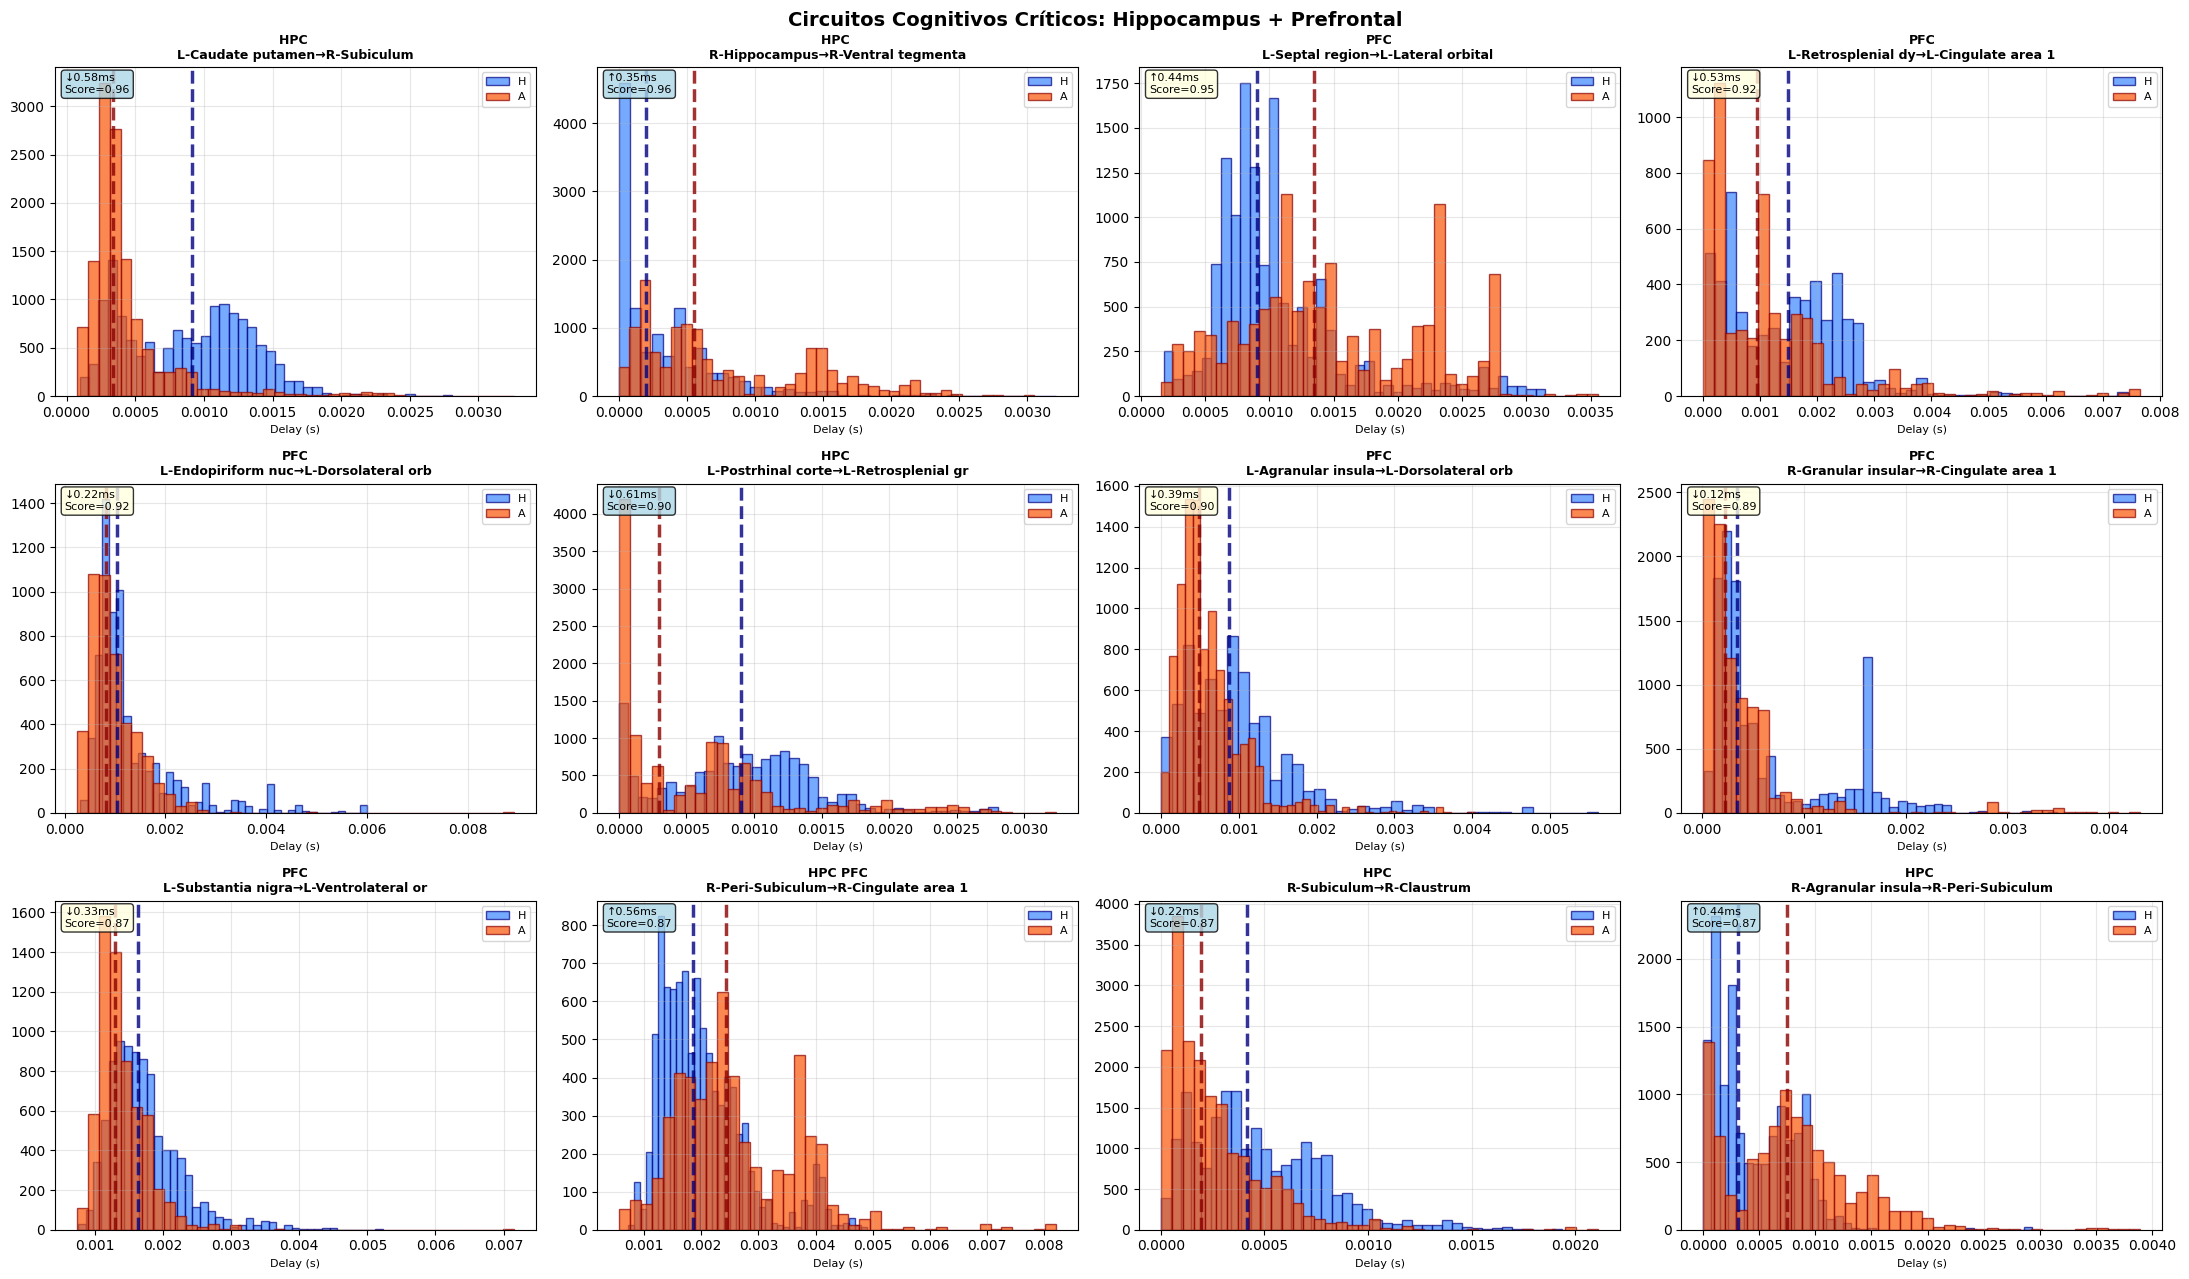

In [ ]:
# === Visualización top 12 cognitivos ===
fig, axes = plt.subplots(3, 4, figsize=(22, 13))
axes = axes.flatten()

for idx, (_, row) in enumerate(top_cog.head(12).iterrows()):
    i, j = int(row.roi_i), int(row.roi_j)
    h_delays = pool_delays(healthy_rats, i, j)
    a_delays = pool_delays(alcoholic_rats, i, j)
    
    ax = axes[idx]
    ax.hist(h_delays, bins=40, alpha=0.7, label='H', density=True, color='#3A86FF', edgecolor='navy')
    ax.hist(a_delays, bins=40, alpha=0.7, label='A', density=True, color='#FB5607', edgecolor='darkred')
    
    ax.axvline(np.median(h_delays), color='navy', linestyle='--', lw=2.5, alpha=0.8)
    ax.axvline(np.median(a_delays), color='darkred', linestyle='--', lw=2.5, alpha=0.8)
    
    # Etiquetas
    hpc = "HPC " if row.involves_hpc else ""
    pfc = "PFC" if row.involves_pfc else ""
    title = f"{hpc}{pfc}\n{row.roi_i_name[:18]}→{row.roi_j_name[:18]}"
    ax.set_title(title, fontsize=9, fontweight='bold')
    ax.set_xlabel('Delay (s)', fontsize=8)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    
    delta = (np.median(a_delays) - np.median(h_delays)) * 1000
    direction = '↑' if delta > 0 else '↓'
    ax.text(0.02, 0.98, f'{direction}{abs(delta):.2f}ms\nScore={row.composite_score:.2f}', 
            transform=ax.transAxes, fontsize=8, va='top',
            bbox=dict(boxstyle='round', facecolor='lightblue' if row.involves_hpc else 'lightyellow', alpha=0.8))

plt.suptitle('Circuitos Cognitivos Críticos: Hippocampus + Prefrontal', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Ver rango real de índices
all_i = [i for rat_data in healthy_rats.values() for (i,j) in rat_data.keys()]
all_j = [j for rat_data in healthy_rats.values() for (i,j) in rat_data.keys()]
print(f"ROI i: min={min(all_i)}, max={max(all_i)}")
print(f"ROI j: min={min(all_j)}, max={max(all_j)}")

ROI i: min=3, max=155
ROI j: min=4, max=156


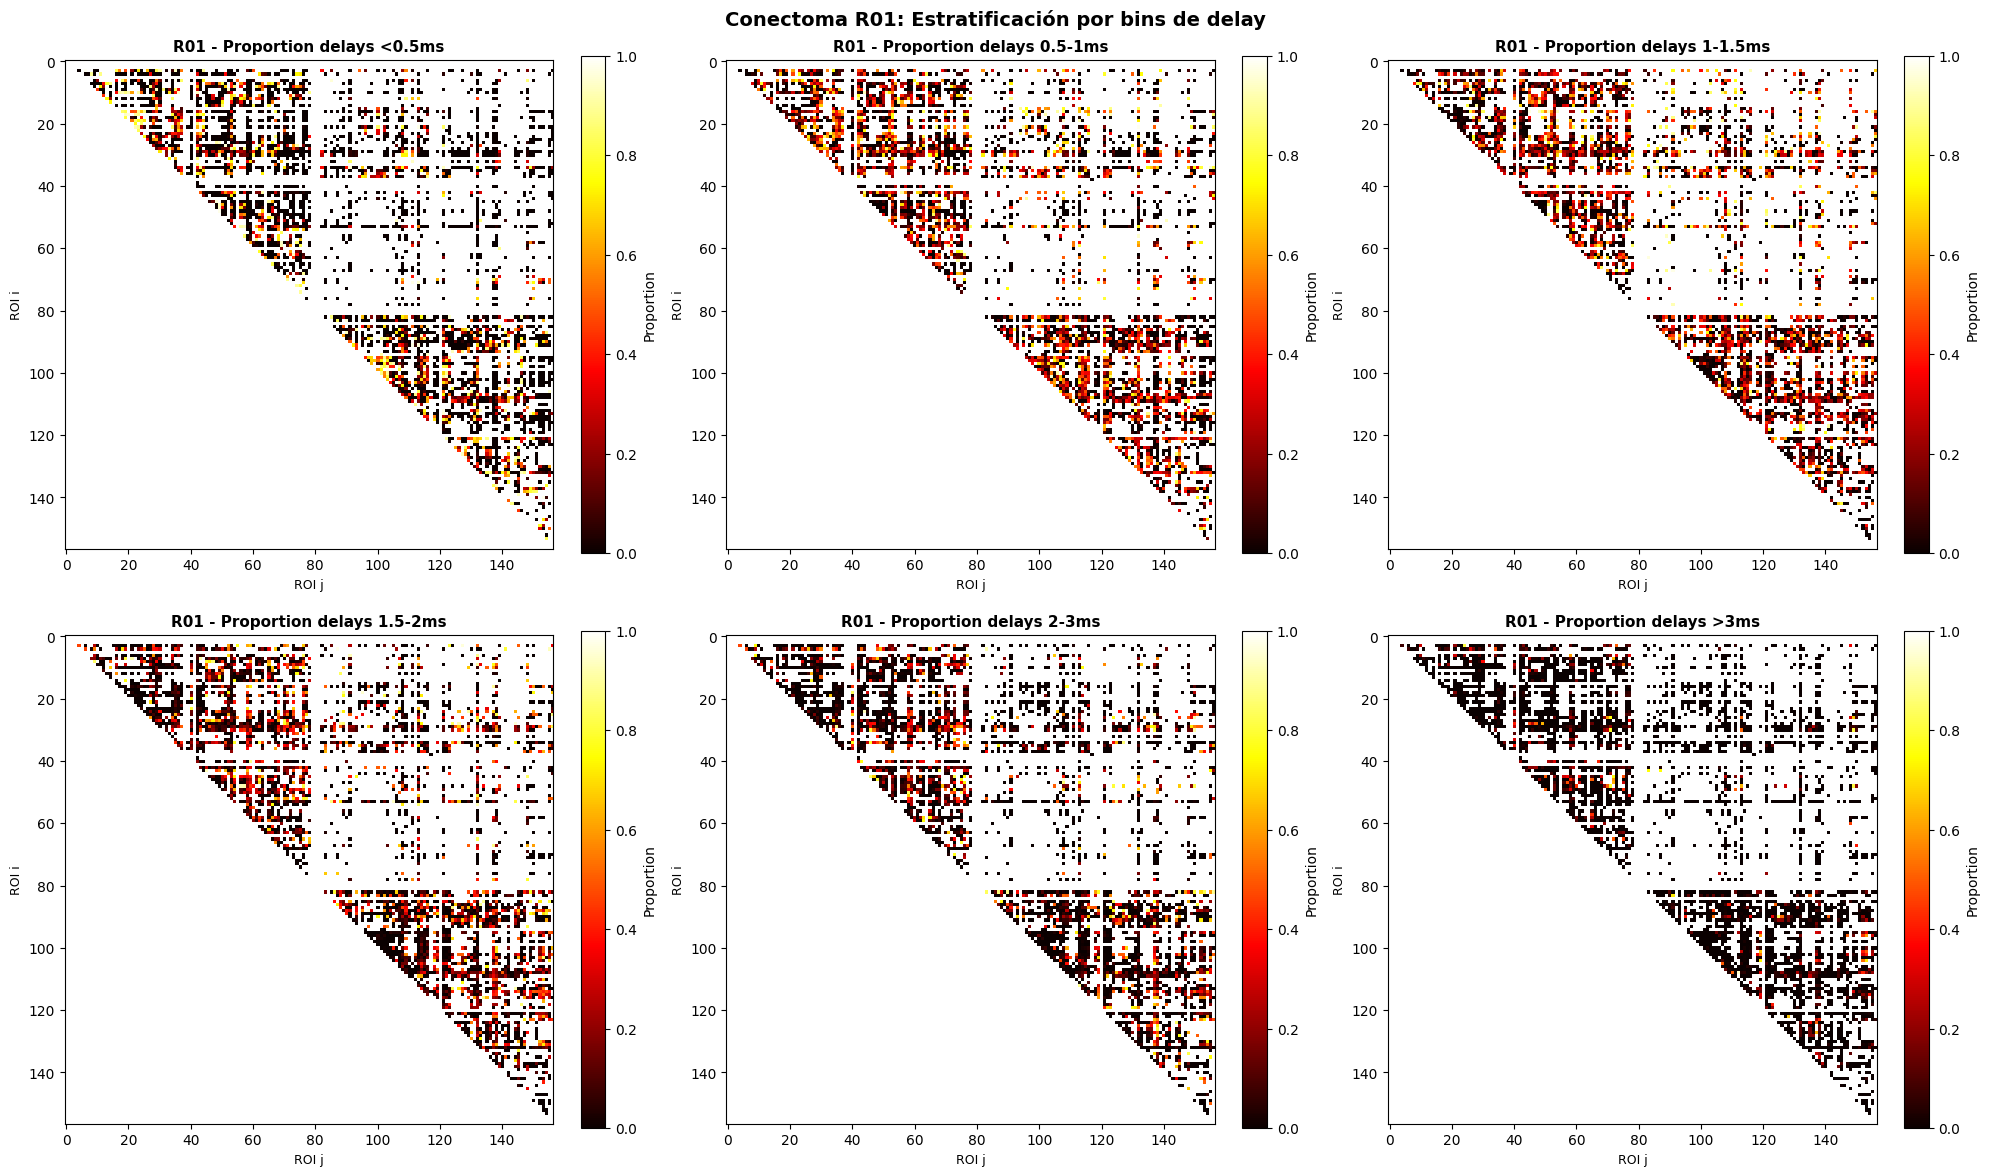


DISTRIBUCIÓN GLOBAL DE DELAYS (R01):
<0.5ms     | 3841 pares | Prop. media=0.195
0.5-1ms    | 3841 pares | Prop. media=0.227
1-1.5ms    | 3841 pares | Prop. media=0.222
1.5-2ms    | 3841 pares | Prop. media=0.184
2-3ms      | 3841 pares | Prop. media=0.137
>3ms       | 3841 pares | Prop. media=0.035


In [ ]:
# === VERSION 2D: Estratificación por bins ===
rat_id = 'R01'
rat_data = healthy_rats[rat_id]

# Bins de delay
delay_bins = [0, 0.0005, 0.001, 0.0015, 0.002, 0.003, np.inf]
bin_labels = ['<0.5ms', '0.5-1ms', '1-1.5ms', '1.5-2ms', '2-3ms', '>3ms']

# Construir matrices por bin
matrices_bins = [np.full((157, 157), np.nan) for _ in range(len(delay_bins)-1)]

for (i, j), fibers in rat_data.items():
    
     # Verificar índices válidos
    # if i >= 156 or j >= 156 or i < 0 or j < 0:
    #     print(i,j)
    #     continue
    if len(fibers) > 0:
        delays = np.array(fibers)[:, COL_TAU]
        n_total = len(delays)
        
        for bin_idx, (low, high) in enumerate(zip(delay_bins[:-1], delay_bins[1:])):
            n_in_bin = ((delays >= low) & (delays < high)).sum()
            if n_total > 0:
                matrices_bins[bin_idx][i, j] = n_in_bin / n_total

# Plot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (mat, label) in enumerate(zip(matrices_bins, bin_labels)):
    im = axes[idx].imshow(mat, cmap='hot', vmin=0, vmax=1, interpolation='nearest')
    axes[idx].set_title(f'{rat_id} - Proportion delays {label}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('ROI j', fontsize=9)
    axes[idx].set_ylabel('ROI i', fontsize=9)
    plt.colorbar(im, ax=axes[idx], label='Proportion', fraction=0.046)
    axes[idx].grid(False)

plt.suptitle(f'Conectoma {rat_id}: Estratificación por bins de delay', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Stats por bin
print(f"\n{'='*60}")
print(f"DISTRIBUCIÓN GLOBAL DE DELAYS ({rat_id}):")
print(f"{'='*60}")
for idx, label in enumerate(bin_labels):
    mat = matrices_bins[idx]
    n_pairs = (~np.isnan(mat)).sum()
    mean_prop = np.nanmean(mat)
    print(f"{label:10} | {n_pairs:4} pares | Prop. media={mean_prop:.3f}")

In [ ]:
# === VERSION 3D: Plotly interactivo ===
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preparar datos 3D
fiber_data = []
for (i, j), fibers in rat_data.items():
    if len(fibers) > 0:
        delays = np.array(fibers)[:, COL_TAU]
        for delay in delays:
            fiber_data.append([i, j, delay*1000])  # ms para escala

fiber_data = np.array(fiber_data)

# Crear figura 3D
fig = go.Figure()

# Scatter 3D de todas las fibras
fig.add_trace(go.Scatter3d(
    x=fiber_data[:,0],
    y=fiber_data[:,1],
    z=fiber_data[:,2],
    mode='markers',
    marker=dict(
        size=1.5,
        color=fiber_data[:,2],
        colorscale='Plasma',
        showscale=True,
        colorbar=dict(title='Delay (ms)', thickness=15),
        opacity=0.6
    ),
    name='Fibers',
    hovertemplate='ROI %{x} → %{y}<br>Delay: %{z:.3f}ms<extra></extra>'
))

fig.update_layout(
    title=f'Conectoma 3D: {rat_id} ({len(fiber_data)} fibras)',
    scene=dict(
        xaxis_title='ROI i',
        yaxis_title='ROI j',
        zaxis_title='Delay (ms)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.3))
    ),
    width=900,
    height=700,
    font=dict(size=11)
)

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# === Preparar datos ===
from sklearn.model_selection import train_test_split
import numpy as np

# Expandir: cada par genera 2 samples (H y A)
X = []
y = []

for _, row in df_histograms.iterrows():
    X.append(row['hist_h'])  # Healthy
    y.append(0)
    X.append(row['hist_a'])  # Alcoholic
    y.append(1)

X = np.array(X).reshape(-1, 50, 1)  # (7622, 50, 1)
y = np.array(y)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train: {X_train.shape}, balance={y_train.mean():.2f}")
print(f"Test: {X_test.shape}, balance={y_test.mean():.2f}")

Train: (2200, 50, 1), balance=0.50
Test: (550, 50, 1), balance=0.50


In [ ]:
# === CNN 1D ===
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

model = models.Sequential([
    layers.Conv1D(32, 5, activation='relu', input_shape=(50, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 46, 32)            192       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 23, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 21, 64)            6208      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 10, 64)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              

Epoch 1/100
55/55 [==============================] - 2s 7ms/step - loss: 0.6934 - accuracy: 0.4784 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4852 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5085 - val_loss: 0.6929 - val_accuracy: 0.5114 - lr: 0.0010
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4852 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5102 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6

18/18 [==============================] - 0s 977us/step

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       275
   Alcoholic       0.50      1.00      0.67       275

    accuracy                           0.50       550
   macro avg       0.25      0.50      0.33       550
weighted avg       0.25      0.50      0.33       550


Confusion Matrix:
[[  0 275]
 [  0 275]]

AUC: 0.541


/home/tonicoll/.conda/envs/tfgpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tonicoll/.conda/envs/tfgpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tonicoll/.conda/envs/tfgpu/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

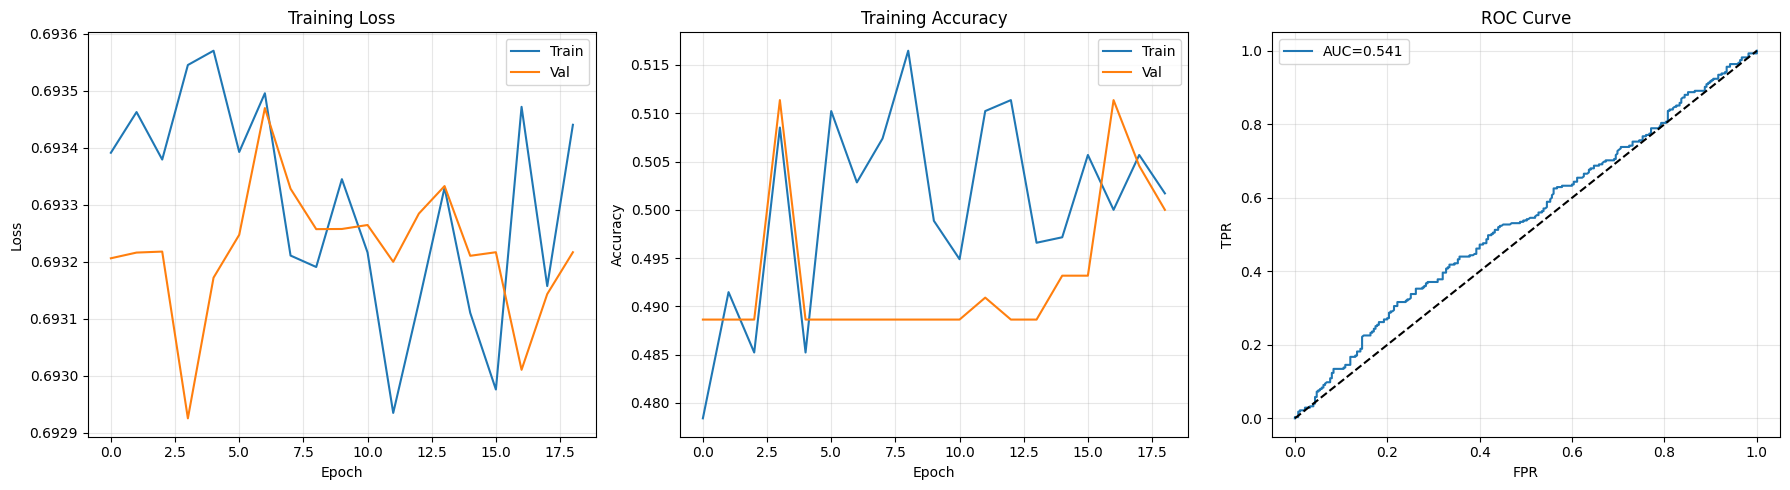

In [ ]:
# === Análisis ===
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Alcoholic']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC: {auc:.3f}")

# Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training curves
axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Val')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train')
axes[1].plot(history.history['val_accuracy'], label='Val')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy')
axes[1].legend()
axes[1].grid(alpha=0.3)

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[2].plot(fpr, tpr, label=f'AUC={auc:.3f}')
axes[2].plot([0,1], [0,1], 'k--')
axes[2].set_xlabel('FPR')
axes[2].set_ylabel('TPR')
axes[2].set_title('ROC Curve')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 46, 32)            192       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 23, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 21, 64)            6208      
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 10, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 640)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

Epoch 1/100
55/55 [==============================] - 2s 7ms/step - loss: 0.6939 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5136 - lr: 0.0010
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4960 - val_loss: 0.6934 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4898 - val_loss: 0.6935 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4915 - val_loss: 0.6931 - val_accuracy: 0.5023 - lr: 0.0010
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6934 - val_accuracy: 0.4886 - lr: 0.0010
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6

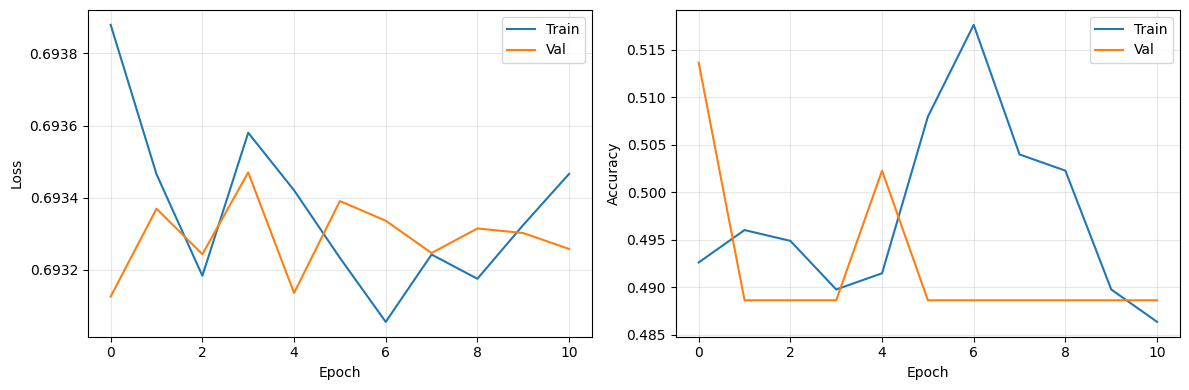

In [ ]:
# === CNN 1D ===
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

model = models.Sequential([
    layers.Conv1D(32, 5, activation='relu', input_shape=(50, 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.3f}")

# Plot training
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Val')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train')
axes[1].plot(history.history['val_accuracy'], label='Val')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.tight_layout()
plt.show()